#**LA_Metro_BikeShare Dataset**

This dataset is about Metro Bike Share, a bicycle sharing system in the Los Angeles, California metropolitan area. This dataset covers the years 2016-2021 and has 1.25M rows and 16 columns. We also have the Stations dataset that consists of 348 rows and 5 columns of bike station rental data directly related to the Bike Share dataset. After some investigating and cleaning, we will be merging these two datasets, perform some feature engineering, and executing an explaortory data analysis.

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import missingno as msno
from google.colab import files
from google.colab import drive
import io
import statsmodels.api as sm
import shap
import sys
sys.path.append('../')
%matplotlib inline

In [ ]:
#setting up the environment
#ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt
#!pip unfreeze requirements.txt

#remove the restriction on jupyter that lmiits the columns displayed (the...in the middle)
pd.set_option('display.max_columns', None)
#docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

#pretty display of variables. for instance, you can call df.head() and df.tail() in the same cell and both display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#list of all magic commands. to run a magic comman %var --- i.e.: %env
%lsmagic
#%env  -- list environment variables
#%%time  -- gives you information about how long a cel took to run
#%%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
#%pdb -- python debugger

#to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

#python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

#scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%bqsql  %%capture  %%debug  %%file  %%html  %%javascript  %%j

1.26.4
1.6.1


#**1. Find/Load Dataset**
Deliverable: Notebook with code to load the dataset.

In [ ]:
#mount google drive
drive.mount('/content/drive')

#path to the file in google drive
file_path = '/content/drive/MyDrive/LA_Metro_BikeShare.csv'

#read the file
bike_df = pd.read_csv(file_path)
bike_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-221-3375d9237fc6>:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_df = pd.read_csv(file_path)


,trip_id,duration,start_time,end_time,bike_id,trip_route_category,plan_duration,passholder_type,bike_type,start_station,end_station,start_lat,start_lon,end_lat,end_lon,taxicab_distance
0,1912818,3,07/07/2016 4:17,07/07/2016 4:20,6281,Round Trip,30,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,0.000000
1,1919661,33,07/07/2016 6:00,07/07/2016 6:33,6281,Round Trip,30,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,0.000000
2,1933383,5,07/07/2016 10:32,07/07/2016 10:37,5861,Round Trip,365,Annual Pass,standard,3016,3016,34.052898,-118.24156,34.052898,-118.24156,0.000000
3,1940317,7,07/07/2016 12:51,07/07/2016 12:58,6674,Round Trip,0,Walk-up,standard,3032,3032,34.049889,-118.25588,34.049889,-118.25588,0.000000
4,1943980,9,07/07/2016 13:50,07/07/2016 13:59,6108,One Way,30,Monthly Pass,standard,3033,3030,34.040989,-118.25580,34.051941,-118.24353,0.023222


In [ ]:
#indexing 'trip_id'
bike_df.set_index('trip_id', inplace=True)

In [ ]:
#path to the file in google drive
file_path2 = '/content/drive/MyDrive/stations.csv'

#read the file
station_df = pd.read_csv(file_path2)
station_df.head()

,station_id,station_name,date_first_active,location,status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


#**2a. Structural Investigation (Bike Share)**
Deliverable: Report on the structural aspects of the dataset.

In [ ]:
#getting basic stat info on bike_df
bike_df.describe()

,duration,plan_duration,start_station,end_station,start_lat,start_lon,end_lat,end_lon,taxicab_distance
count,1.250835e+06,1.250835e+06,1.250835e+06,1.250835e+06,1.250835e+06,1.250835e+06,1.250835e+06,1.250835e+06,1.250835e+06
mean,2.407156e+01,4.453047e+01,3.459087e+03,3.458829e+03,3.404484e+01,-1.182471e+02,3.404407e+01,-1.182471e+02,4.562811e-02
std,3.874905e+01,9.115234e+01,6.007771e+02,6.005801e+02,3.680930e-01,2.402163e+00,3.832959e-01,2.393718e+00,2.292634e+00
min,1.000000e+00,0.000000e+00,3.005000e+03,3.005000e+03,0.000000e+00,-1.184954e+02,0.000000e+00,-1.184954e+02,0.000000e+00
25%,7.000000e+00,1.000000e+00,3.030000e+03,3.030000e+03,3.403919e+01,-1.182772e+02,3.403861e+01,-1.182772e+02,5.982000e-03
50%,1.200000e+01,3.000000e+01,3.063000e+03,3.063000e+03,3.404681e+01,-1.182567e+02,3.404661e+01,-1.182567e+02,1.200800e-02
75%,2.500000e+01,3.000000e+01,4.210000e+03,4.210000e+03,3.405194e+01,-1.182464e+02,3.405091e+01,-1.182459e+02,2.095800e-02
max,4.790000e+02,3.650000e+02,4.587000e+03,4.587000e+03,5.570553e+01,1.182383e+02,5.570553e+01,3.760654e+01,2.365118e+02


In [ ]:
#getting a closer look at 'plan_duration'
bike_df['plan_duration'].nunique()
bike_df['plan_duration'].unique()

4

array([ 30, 365,   0,   1])

In [ ]:
#data type count
pd.value_counts(bike_df.dtypes)

,count
object,6
float64,5
int64,4


In [ ]:
#info on bike_df
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250835 entries, 1912818 to 172222121
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   duration             1250835 non-null  int64  
 1   start_time           1250835 non-null  object 
 2   end_time             1250835 non-null  object 
 3   bike_id              1250835 non-null  object 
 4   trip_route_category  1250835 non-null  object 
 5   plan_duration        1250835 non-null  int64  
 6   passholder_type      1246250 non-null  object 
 7   bike_type            1250835 non-null  object 
 8   start_station        1250835 non-null  int64  
 9   end_station          1250835 non-null  int64  
 10  start_lat            1250835 non-null  float64
 11  start_lon            1250835 non-null  float64
 12  end_lat              1250835 non-null  float64
 13  end_lon              1250835 non-null  float64
 14  taxicab_distance     1250835 non-null  float64


In [ ]:
#extracting the date w/o hours and minutes from the 'start_time' column and creating a new column 'date'
bike_df['date'] = bike_df['start_time'].str.split('/').str[2].str.split(' ').str[0]
bike_df['date'] = pd.to_datetime(bike_df['date'], format='%Y')

In [ ]:
#dropping 'taxicab_distance' as it is not relevant for this particular investigation
#dropping 'plan_duration' as it has the same information as the 'passholder_type' which is self explanatory
#dropping 'start_time' and 'end_time' as there is a significant amount of faulty data in those columns (more details in the summary and in the report)
bike_df.drop(columns=['taxicab_distance','plan_duration', 'start_time', 'end_time'], inplace=True)

In [ ]:
#seeing if changes were successful
bike_df.sample(5).T

trip_id,123156256,70490416,9518013,107549183,125270134
duration,13,10,7,13,5
bike_id,6373,5806,6580,6128,6636
trip_route_category,One Way,One Way,One Way,Round Trip,One Way
passholder_type,Walk-up,Monthly Pass,Monthly Pass,Walk-up,Monthly Pass
bike_type,standard,standard,standard,standard,standard
start_station,3040,3026,3023,4254,3018
end_station,3074,3005,3048,4254,3031
start_lat,34.05357,34.063179,34.050911,34.028679,34.043732
start_lon,-118.266357,-118.24588,-118.240967,-118.284111,-118.260139
end_lat,34.04417,34.0485,34.041691,34.028679,34.044701


In [ ]:
#evaluating the size of the dataframe
bike_df.shape

(1250835, 12)

In [ ]:
#evaluating categorical features
bike_df.select_dtypes(exclude="number").head()

,bike_id,trip_route_category,passholder_type,bike_type,date
trip_id,,,,,
1912818,6281,Round Trip,Monthly Pass,standard,2016-01-01
1919661,6281,Round Trip,Monthly Pass,standard,2016-01-01
1933383,5861,Round Trip,Annual Pass,standard,2016-01-01
1940317,6674,Round Trip,Walk-up,standard,2016-01-01
1943980,6108,One Way,Monthly Pass,standard,2016-01-01


In [ ]:
#getting a closer look at the 'bike_id' column
bike_df['bike_id'].nunique()

5213

In [ ]:
#getting a closer look at the 'trip_route_category' column
bike_df['trip_route_category'].nunique()
bike_df['trip_route_category'].unique()

6

array(['Round Trip', 'One Way', 'One Day Pa', 'Annual Pas', 'Walk-up',
       'Monthly Pa'], dtype=object)

In [ ]:
#there are only supposed to be 2 values in this column: 'Round Trip' and 'One Way'
#according to the source, anything that is not a 'Round Trip' is a 'One Way' route
#converting values that are not already 'Round Trip' or 'One Way into a 'One Way' value
bike_df['trip_route_category'] = bike_df['trip_route_category'].replace(['One Day Pa', 'Annual Pas', 'Walk-up', 'Monthly Pa'], 'One Way')

In [ ]:
#making sure changes were executed
bike_df['trip_route_category'].nunique()
bike_df['trip_route_category'].unique()

2

array(['Round Trip', 'One Way'], dtype=object)

In [ ]:
#getting a closer look at the 'passholder_type' column
bike_df['passholder_type'].nunique()
bike_df['passholder_type'].unique()

5

array(['Monthly Pass', 'Annual Pass', 'Walk-up', 'One Day Pass',
       'Flex Pass', nan], dtype=object)

In [ ]:
#getting a closer look at the 'bike_type' column
bike_df['bike_type'].nunique()
bike_df['bike_type'].unique()

4

array(['standard', 'electric', 'smart', 'standard/smart'], dtype=object)

<Figure size 1500x400 with 0 Axes>

<ipython-input-239-b4c45231acb9>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'start_station'),
 Text(1, 0, 'end_station'),
 Text(2, 0, 'start_lat'),
 Text(3, 0, 'end_lat'),
 Text(4, 0, 'start_lon'),
 Text(5, 0, 'end_lon'),
 Text(6, 0, 'duration')]

Text(0.5, 1.0, 'Unique values per frequency')

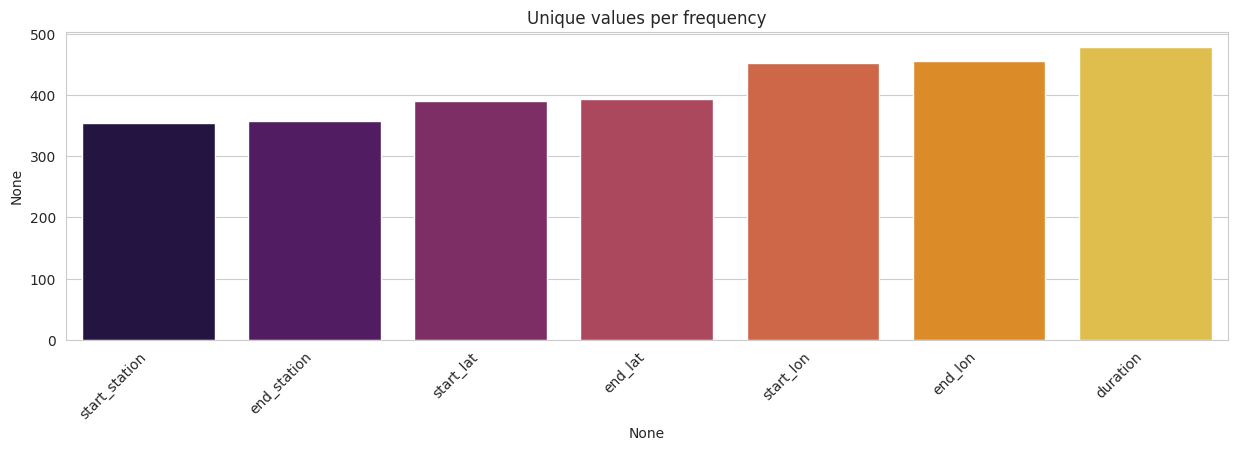

In [ ]:
#evaluation of Numeric Features
unique_values = bike_df.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

##2a. Structural Investigation Summary (Bike Share)

We have 6 object data types (start_time, end_time, bike_id, trip_route_category, passholder_type, bike_type), 5 int data types (trip_id, duration, plan_duration, start_station, end_station), and 5 float datatypes (start_lat, end_lat, start_lon, end_lon, taxicab_distance). I dropped 'taxicab_distance' as it is unclear how this metric is measured exactly (a lot of questions and scenarios came to mind when trying to rationalize) and what it actually represents.

I noticed that plan_duration has 4 values: 30 days, 365 days, 1 day, and 0 days. I saw that passholder_type has 5 values: Monthly Pass, Annual Pass, Walk-up, One Day Pass, and Flex Pass. These same to be the same information more or less (30 days is the Monthly Pass, 365 days is the Annual Pass, etc.) so I dropped plan_duration to avoid the redundancy.

I originally tried to convert start_time and end_time into a datetime format but was receiving errors as some of the entries were formatted differently. I was able to convert the formatting with a different approach but it gave me a significant amount of null values. During the null removal process of the data cleaning, the null values from these two columns alone wiped out nearly 32% of my dataset, which is too much data to lose, and also tells me there were a significant amount of faulty data within these two columns.

Rather than lose out on a date reference for my dataset altogether, I decided to extract the date without the hours and minutes from the ‘start_time’, creating a new column ‘date’, and dropped ‘start_time’ and ‘end_time’. I have ‘duration’ which tells me the amount of time that transpired between the ‘start_time' and ‘end_time’ and ‘date’ which still gives me relevant information, so dropping ‘start_time’ and ‘end_time’ isn’t a total loss by any means. I was able to convert the ‘date’ column into a datetime datatype successfully.

After evaluating the statistical data for the ‘duration’ attribute I observed that the average duration of a trip is 24.07 minutes. The minimum recorded duration of a trip was 1 minute and the maximum duration of a recorded trip was 479 minutes. I also observed that 25% of trips were 7 minutes or less, 50% of trips were 12 minutes or less, and 75% of trips were 25 minutes or less.  This tells us most trips are relatively short distances. Given the range (1-479 minutes) and standard deviation (38.75) of ‘duration’ it is likely that it has some outliers.

There were 6 values in the ‘trip_route_category’ column when there were only supposed to be 2, ‘Round Trip’ and ‘One Way.’  I went to the source and saw that anything other than ‘Round Trip’ is supposed to be ‘One Way.’ I had to engineer the ‘trip_route_category’ column to correct this, so anything that was not ‘Round Trip’ became ‘One Way.’
   



#**2b. Structural Investigation (Station)**
Deliverable: Report on the structural aspects of the dataset.

In [ ]:
#getting basic stat info on station_df
station_df.describe()

,station_id
count,348.000000
mean,4131.939655
std,532.427050
min,3000.000000
25%,4154.750000
50%,4345.500000
75%,4462.250000
max,4587.000000


In [ ]:
#data type count
pd.value_counts(station_df.dtypes)

,count
object,4
int64,1


In [ ]:
#info on station_df
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   station_id         348 non-null    int64 
 1   station_name       348 non-null    object
 2   date_first_active  334 non-null    object
 3   location           347 non-null    object
 4   status             348 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.7+ KB


In [ ]:
#dropping 'date_first_active' as it does not provide much insight in this instance and there is no inactive date to compare data
station_df.drop(columns=['date_first_active'], inplace=True)

In [ ]:
#evaluating the first 5 rows
station_df.sample(5).T

,274,177,155,272,152
station_id,4483,4349,4325,4480,4322
station_name,Glendale & Silver Lake,Rose & Main,Venice & Clarington,Figueroa Plaza,Venice & Inglewood
location,DTLA,Westside,Westside,DTLA,Westside
status,Active,Inactive,Inactive,Active,Inactive


In [ ]:
#evaluating the size of the dataframe
station_df.shape

(348, 4)

In [ ]:
#evaluating categorical features
station_df.select_dtypes(exclude="number").head()

,station_name,location,status
0,Virtual Station,NaN,Active
1,7th & Flower,DTLA,Active
2,Olive & 8th,DTLA,Active
3,5th & Grand,DTLA,Active
4,Figueroa & 9th,DTLA,Active


In [ ]:
#getting a closer look at 'location'
station_df['location'].nunique()
station_df['location'].unique()

6

array([nan, 'DTLA', 'Port of LA', 'Pasadena', 'Westside', 'Free Bikes',
       'North Hollywood'], dtype=object)

In [ ]:
#getting a closer look at 'status'
station_df['status'].nunique()
station_df['status'].unique()

2

array(['Active', 'Inactive'], dtype=object)

##2b. Structural Investigation Summary (Station)
We have 4 object data types (station_name, date_first_active, location, status) and 1 int data type (station_id). I dropped ‘date_first_active’ as we do not have an exact date for inactivity in order to cross reference and bring value to the ‘date_first_active’ data. There are no other major details to report after completing the structural investigation of the Stations dataset.

#**3a. Quality Investigation (Bike Share)**
Deliverable: Cleaned dataset and report on the cleaning process.

##Dupes

In [ ]:
#checking for duplicates (without the index, 'trip_id')
n_duplicates = bike_df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 24995 duplicates in your database.


In [ ]:
#removing duplicates
bike_df = bike_df.drop_duplicates()
bike_df.shape

(1225840, 12)

##Missing Values Per Column/Row

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

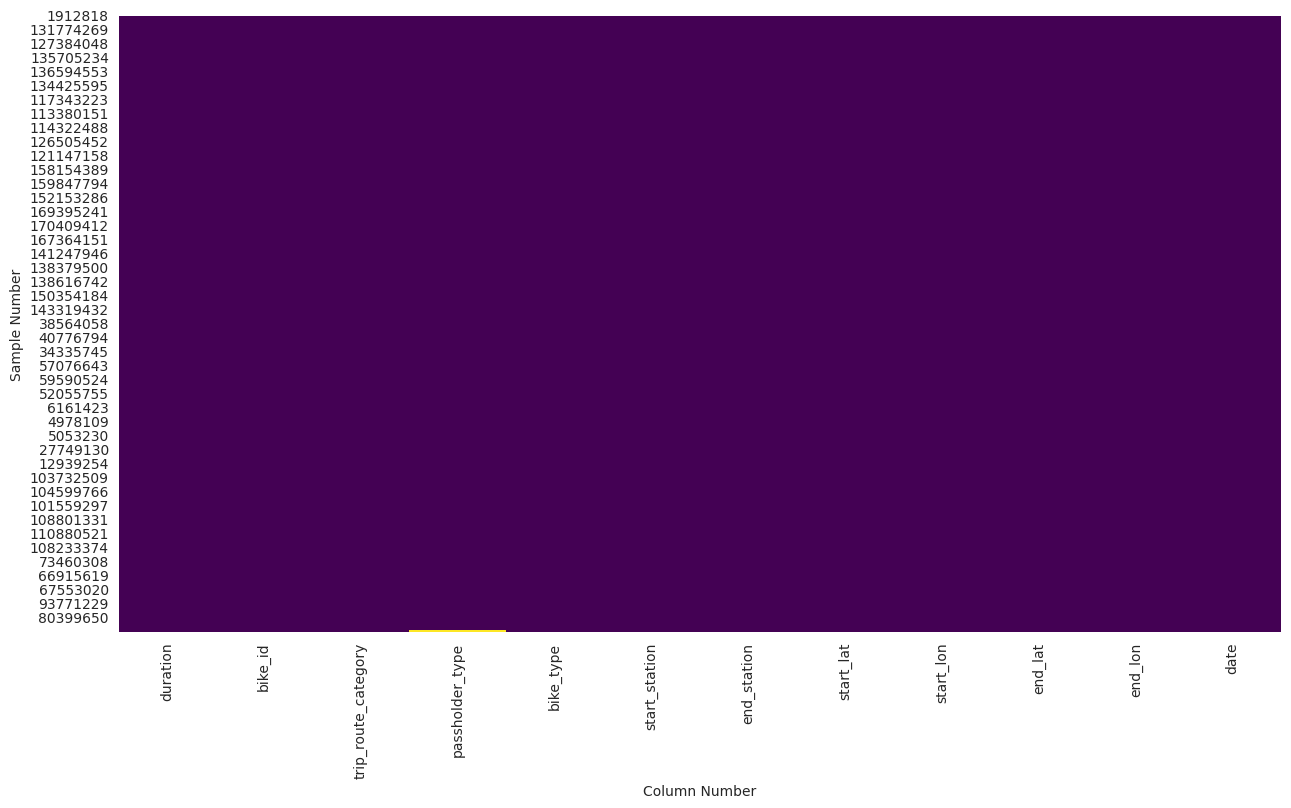

In [ ]:
#evaluating missing values (per sample/row)
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(bike_df.loc[bike_df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

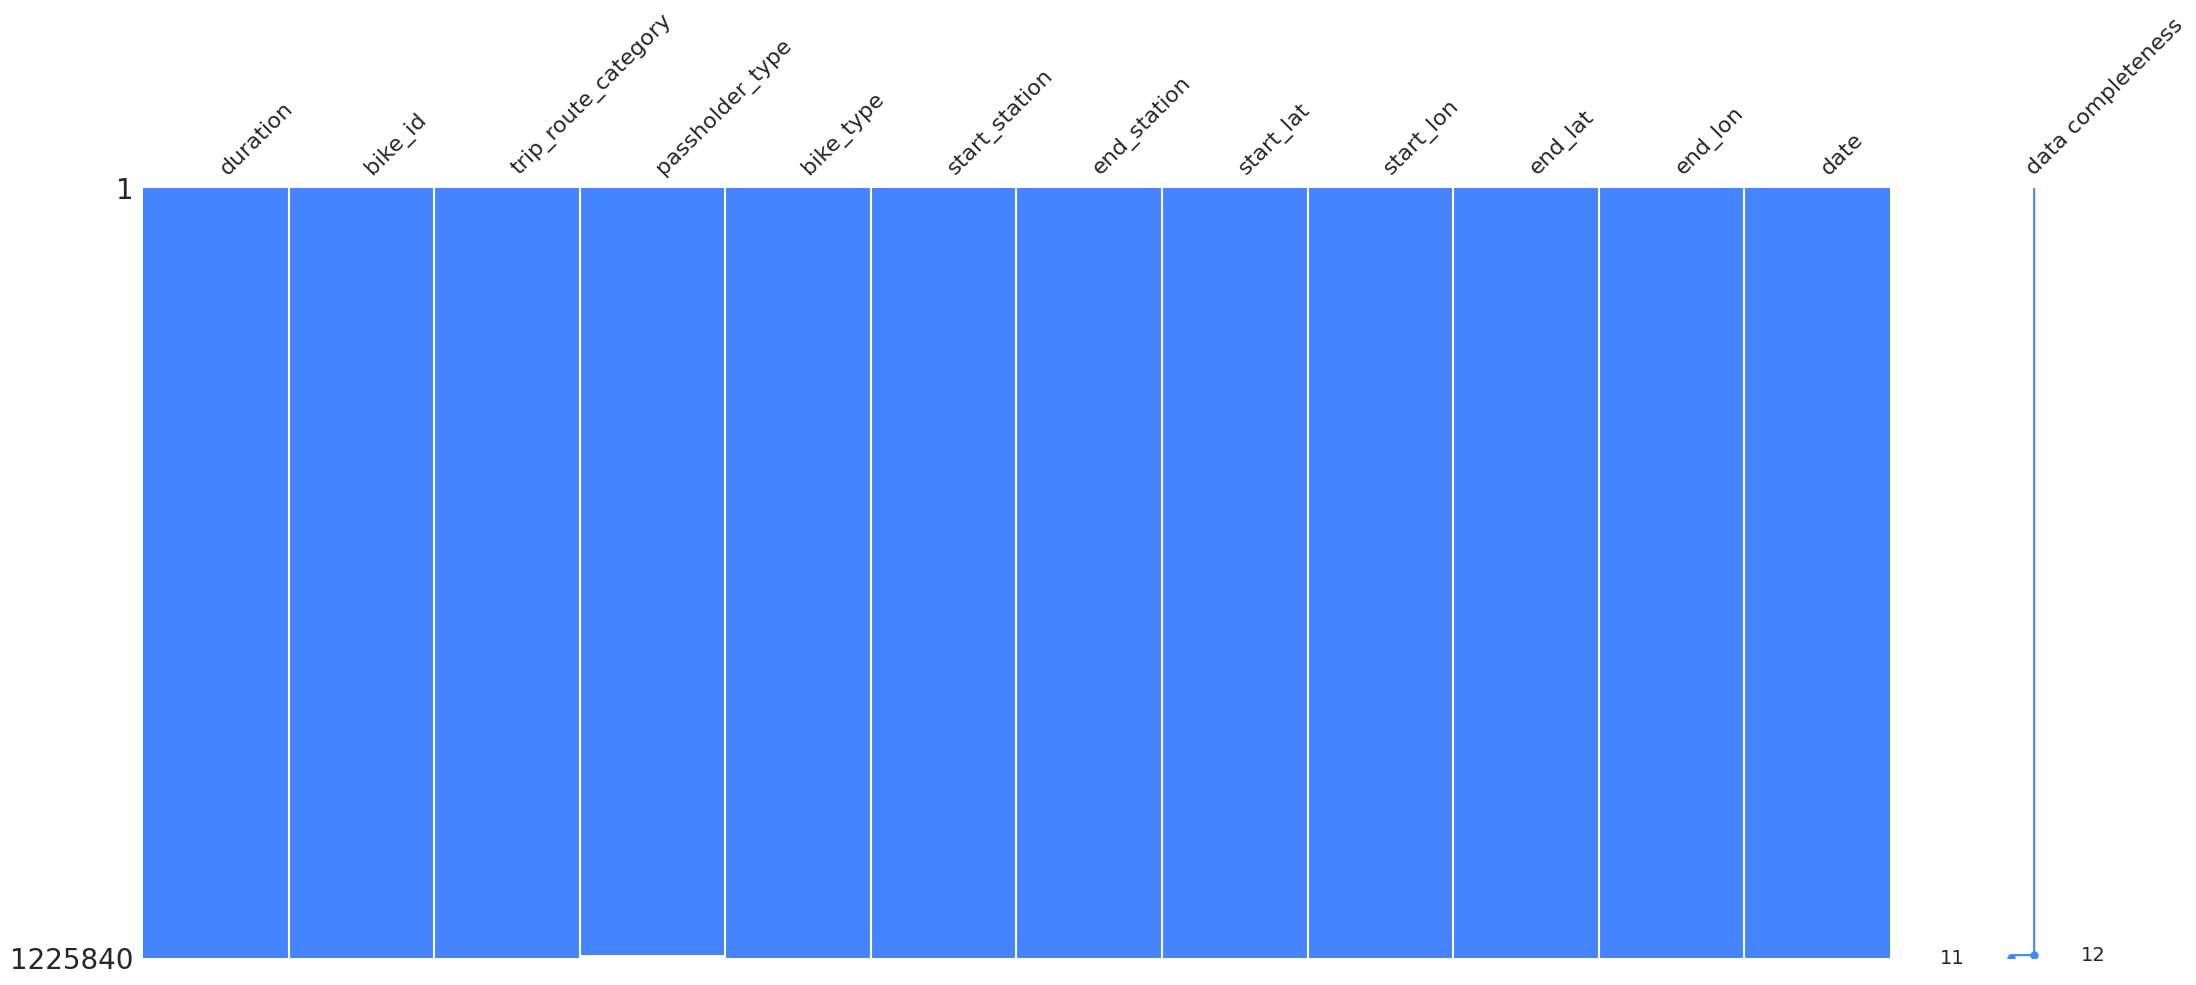

In [ ]:
#another view of missing values (per sample/row)
msno.matrix(bike_df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
#dropping rows with 20% emptiness threshold
cust_df = bike_df.dropna(thresh=bike_df.shape[1] * 0.80, axis=0).reset_index(drop=True)
cust_df.shape

(1225840, 12)

In [ ]:
#evaluating the null values in 'passholder_type'
null_entries = bike_df[bike_df['passholder_type'].isnull()]
print(null_entries)

           duration bike_id trip_route_category passholder_type  \
trip_id                                                           
150066003        16    6341             One Way             NaN   
150079976        19    6341             One Way             NaN   
150104477        22   16243             One Way             NaN   
150104495        26   16243          Round Trip             NaN   
150104507        21   15307             One Way             NaN   
...             ...     ...                 ...             ...   
151707702        29   13412             One Way             NaN   
151707706         5   13412          Round Trip             NaN   
151707712        29    6202             One Way             NaN   
151707713        29    5910             One Way             NaN   
151708887        68   17442          Round Trip             NaN   

                bike_type  start_station  end_station  start_lat   start_lon  \
trip_id                                         

In [ ]:
#filling null values with 'None'
bike_df['passholder_type'].fillna('None', inplace=True)

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

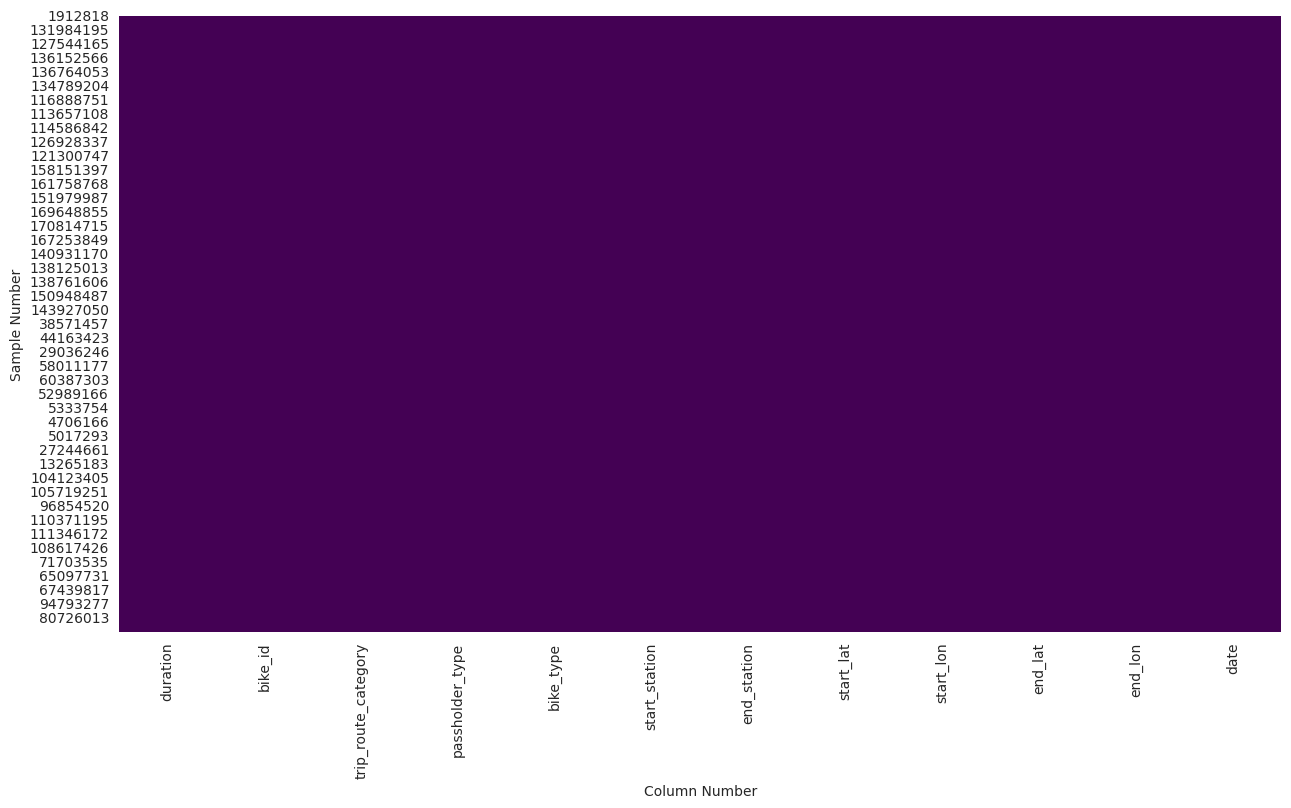

In [ ]:
#revaluating missing values (per sample/row) after dropping empties
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(bike_df.loc[bike_df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

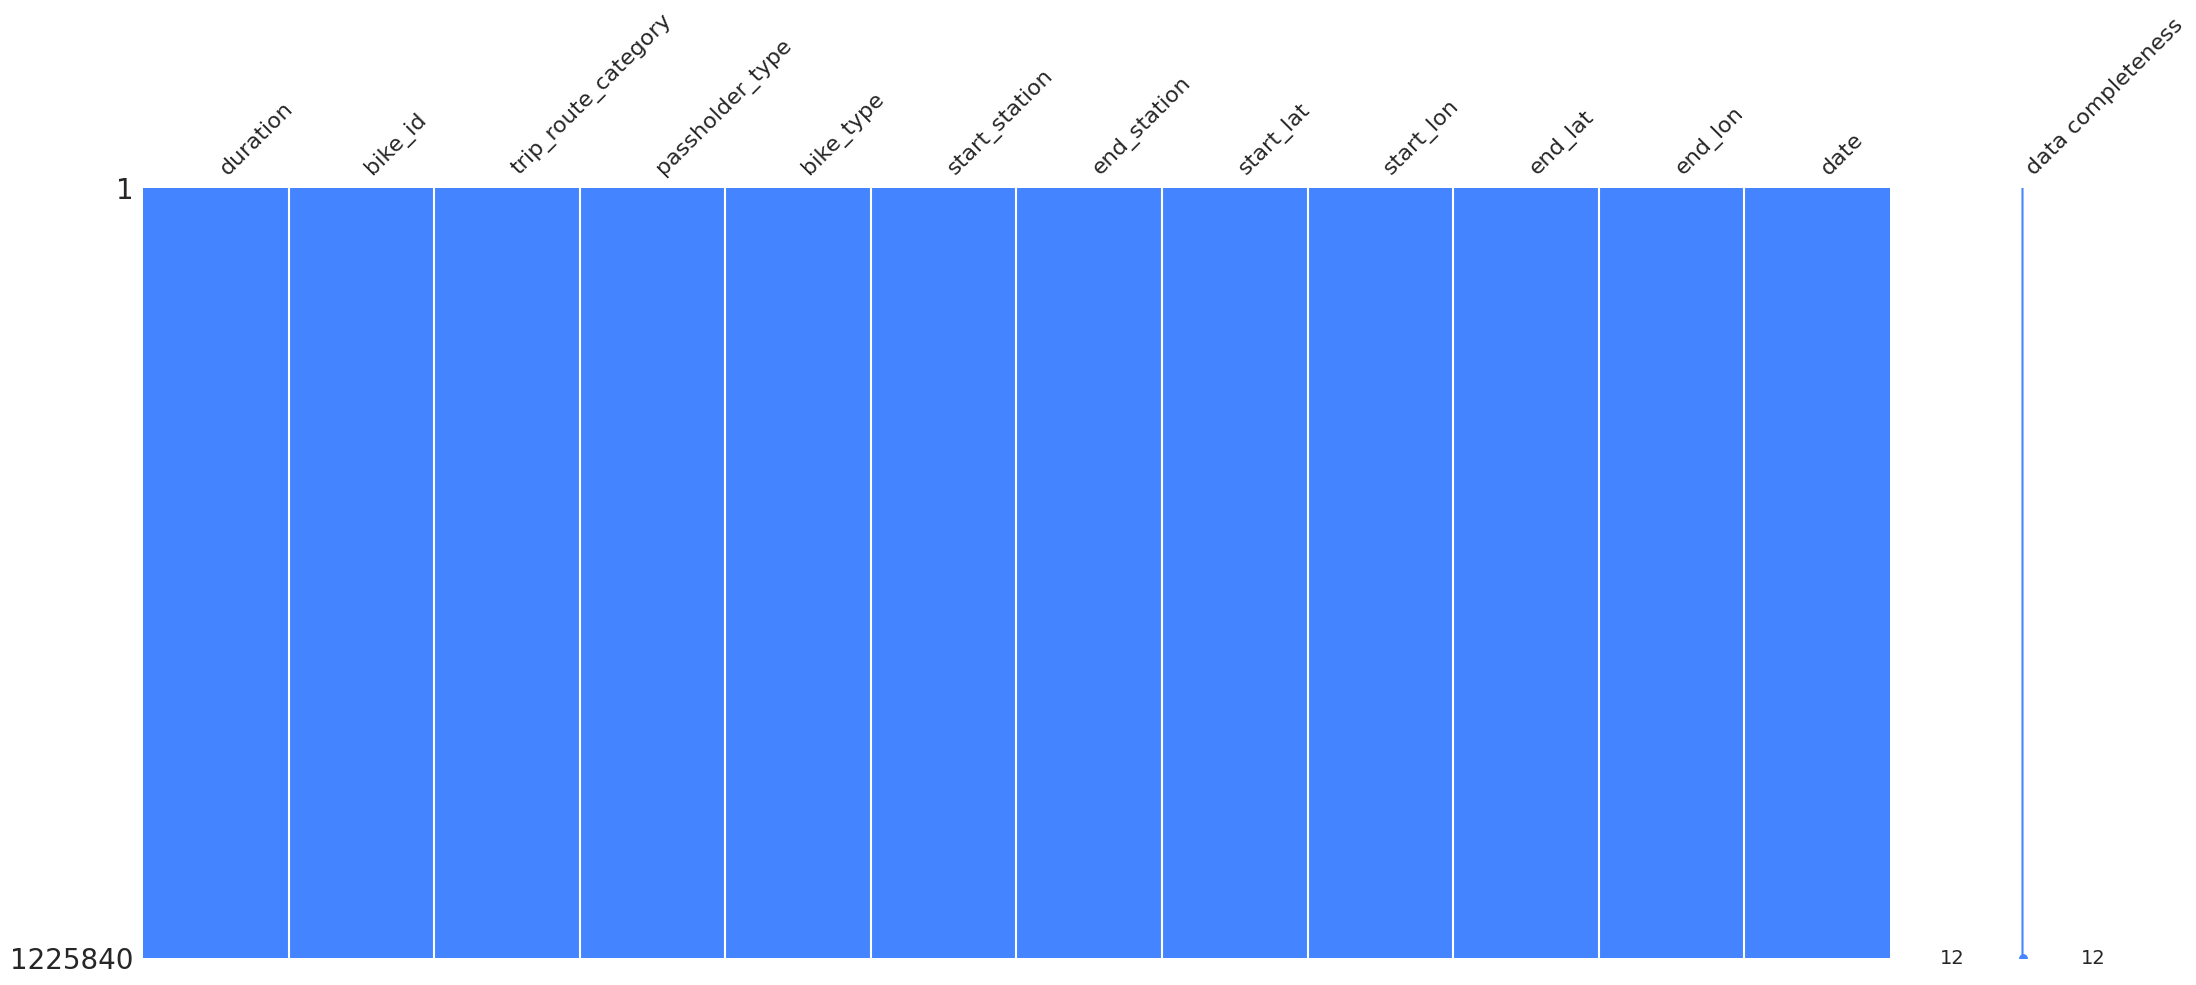

In [ ]:
#another look at revaluating missing values (per sample/row) after dropping empties
msno.matrix(bike_df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

##Per Feature/Per Column

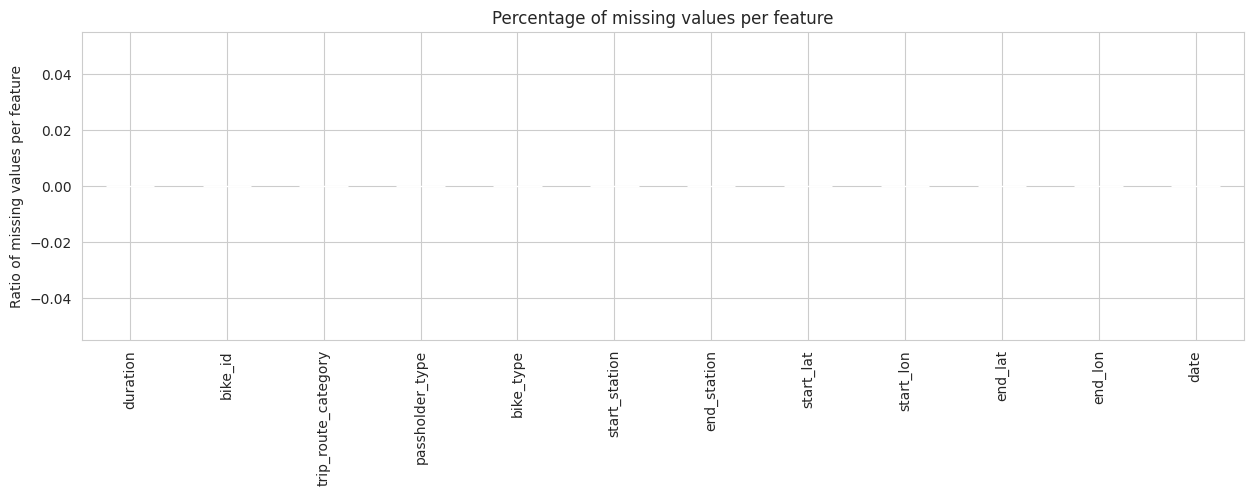

In [ ]:
#evaluating missing values (per feature/column)
bike_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

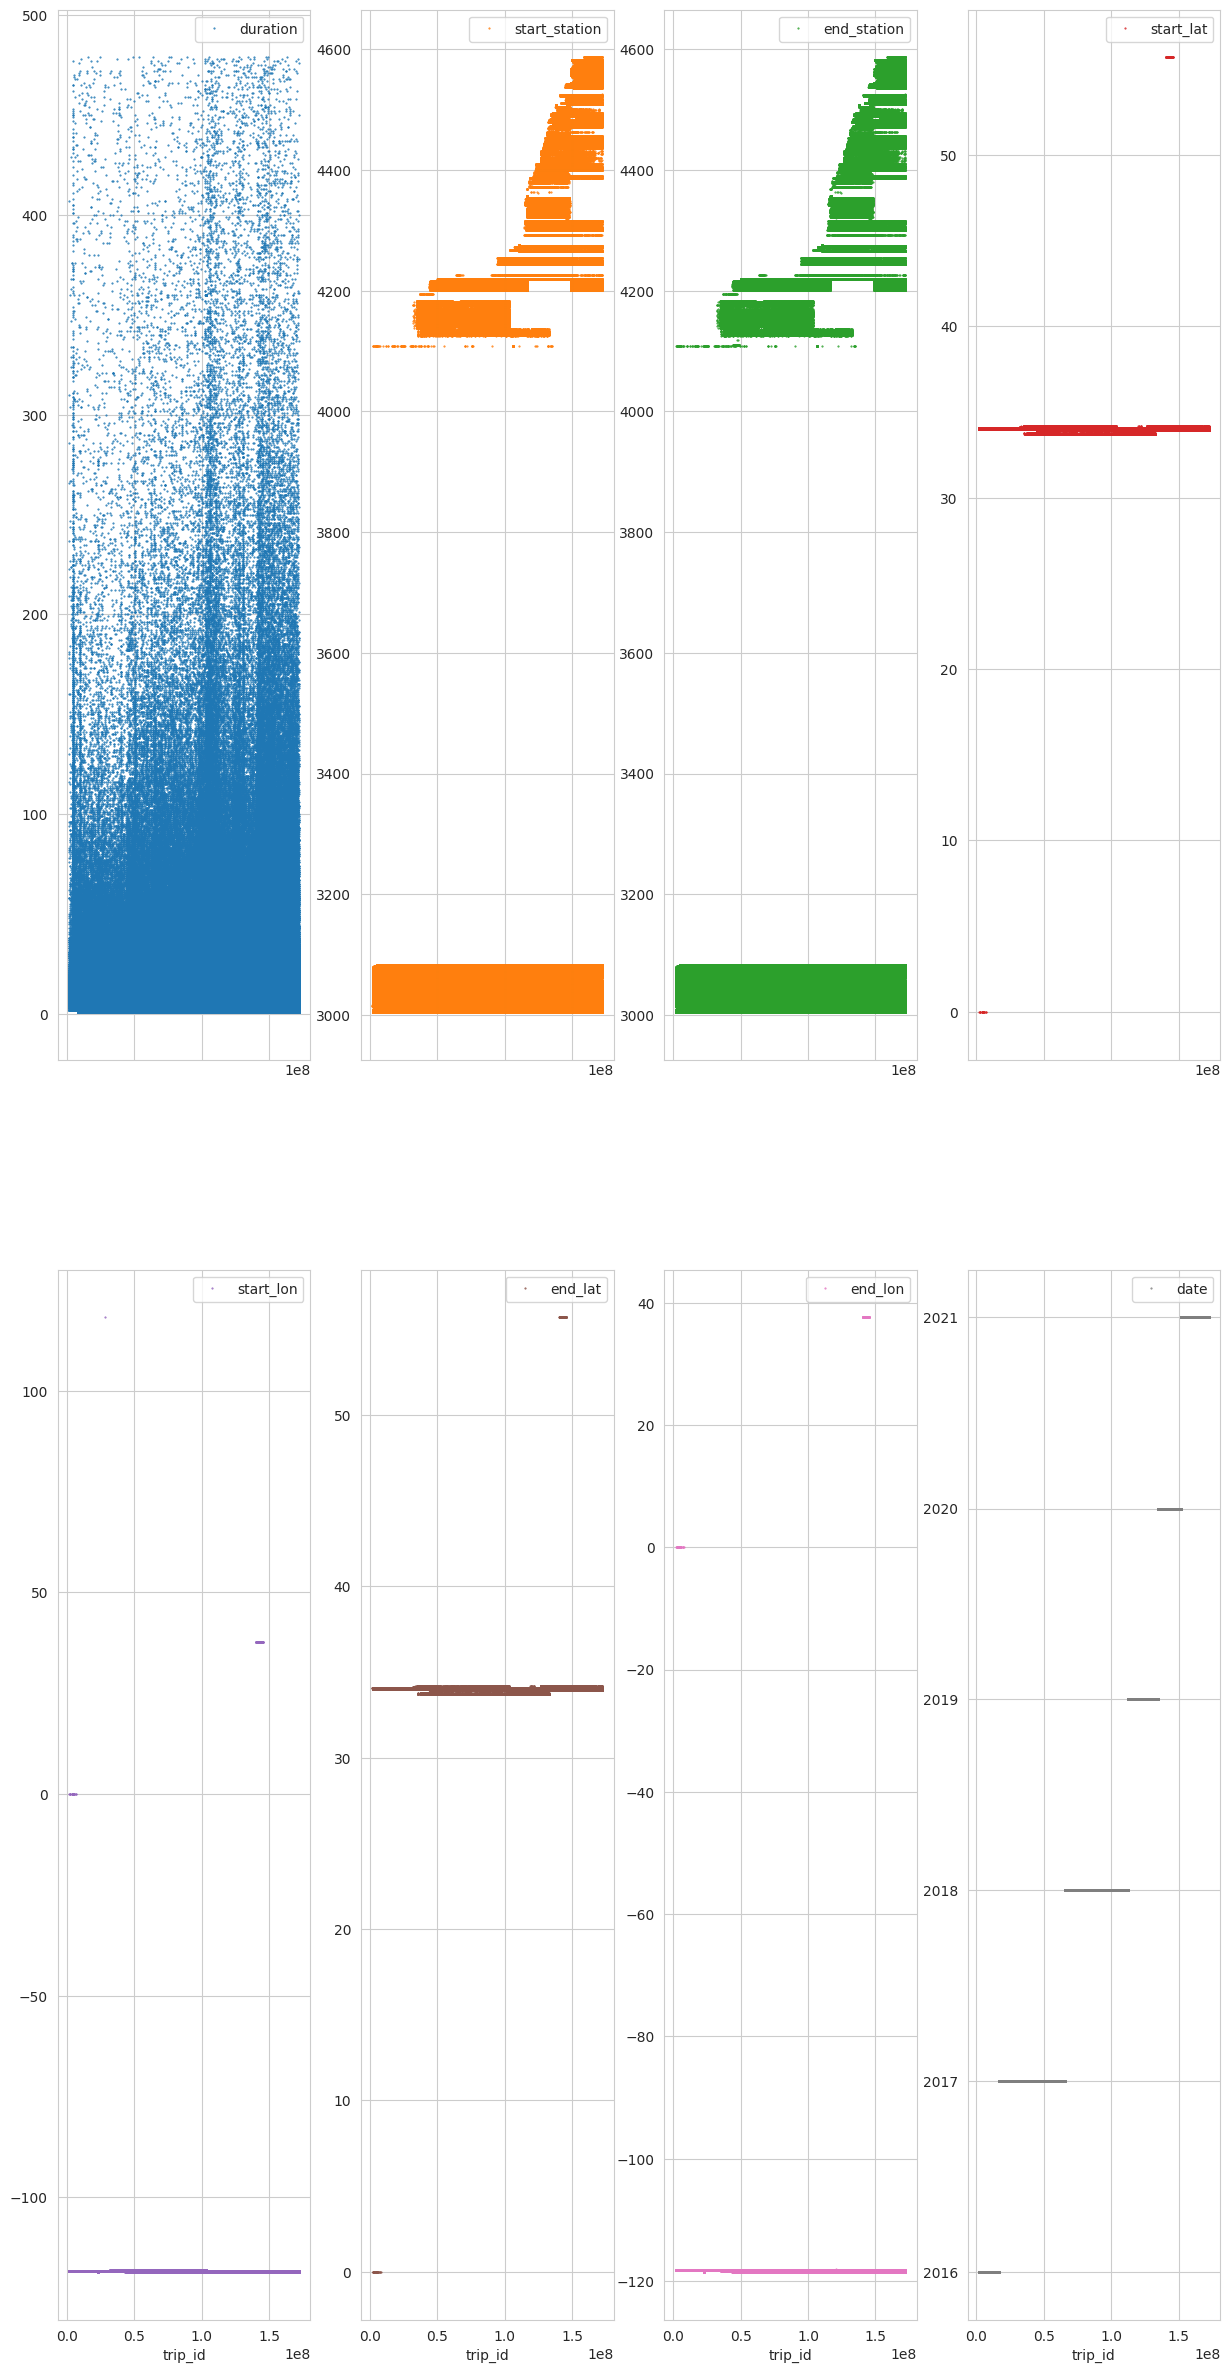

In [ ]:
#plotting all numeric features:
bike_df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

<Axes: ylabel='duration'>

Text(0.5, 1.0, 'duration')

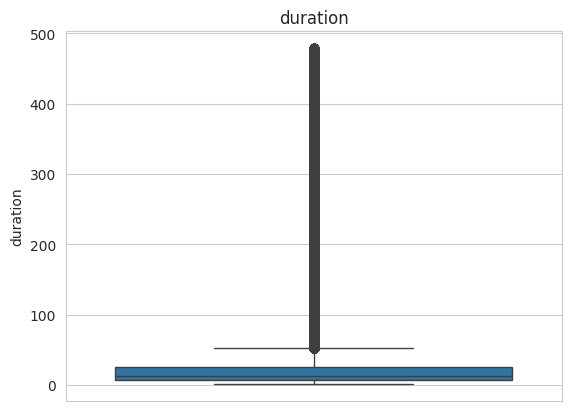

<Axes: ylabel='start_station'>

Text(0.5, 1.0, 'start_station')

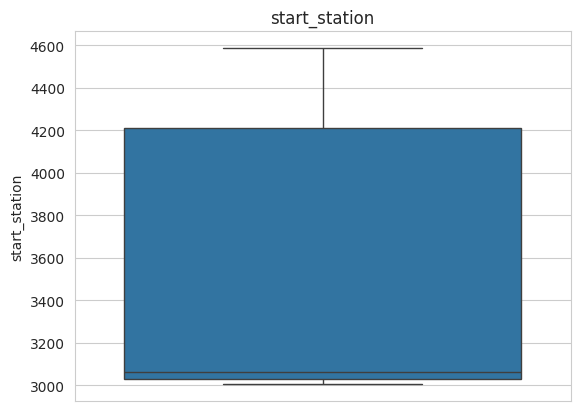

<Axes: ylabel='end_station'>

Text(0.5, 1.0, 'end_station')

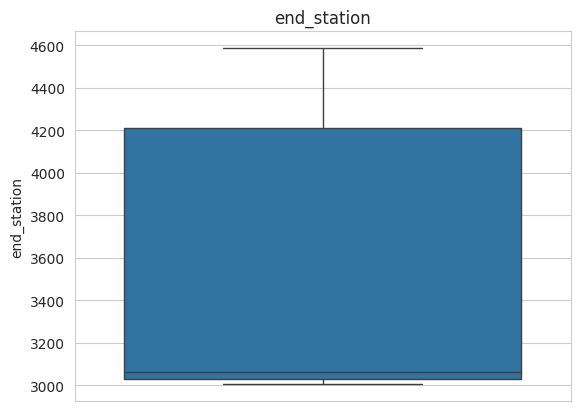

<Axes: ylabel='start_lat'>

Text(0.5, 1.0, 'start_lat')

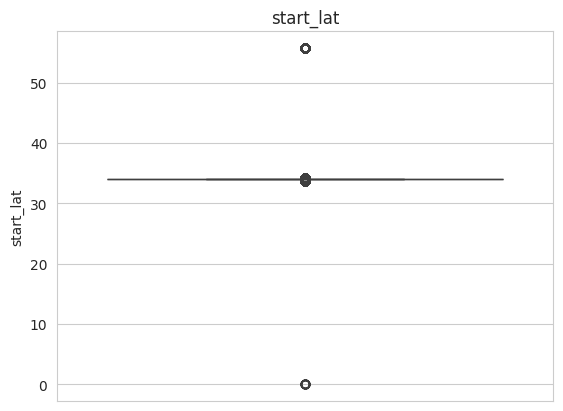

<Axes: ylabel='start_lon'>

Text(0.5, 1.0, 'start_lon')

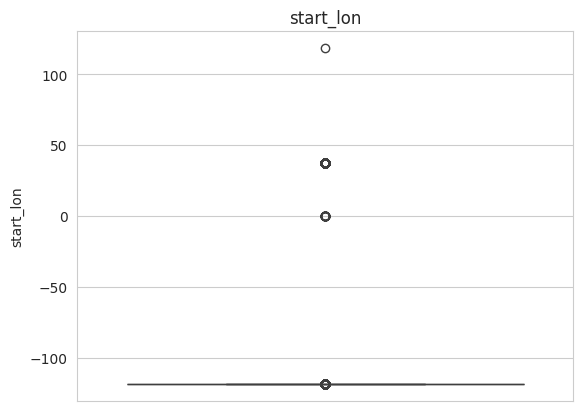

<Axes: ylabel='end_lat'>

Text(0.5, 1.0, 'end_lat')

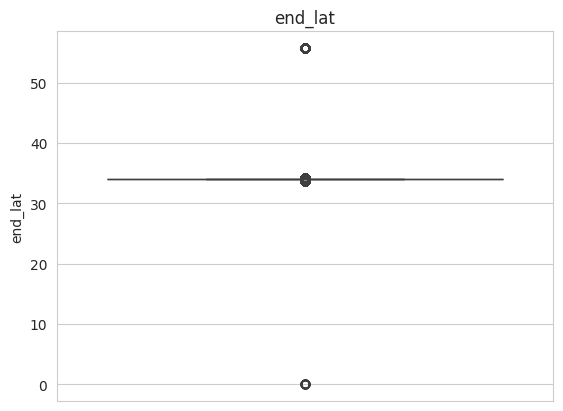

<Axes: ylabel='end_lon'>

Text(0.5, 1.0, 'end_lon')

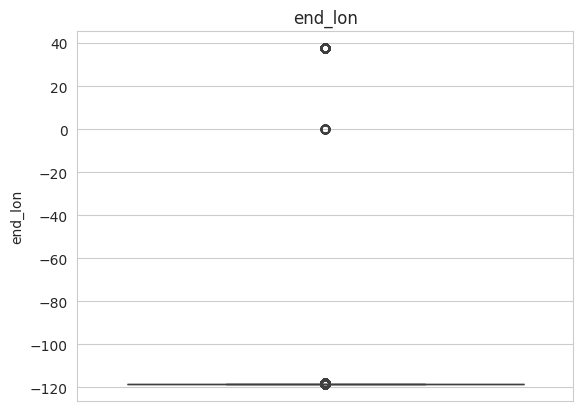

In [ ]:
#using boxplots to check for outliers
numeric_cols = bike_df.select_dtypes(include=['number']).columns

df_numeric = bike_df[numeric_cols]

for col in df_numeric.columns:
    sns.boxplot(data=cust_df[col])
    plt.title(col)
    plt.show()

In [ ]:
#'duration' has outliers that need to be removed
from scipy.stats.mstats import winsorize

In [ ]:
#evaluating the bottom point
#this quantile seems high but there is an explanation as to why in the summary
bike_df['duration'].quantile(0.11)

4.0

In [ ]:
#evaluting the upper point
#this quantile seems high but there is an explanation as to why in the summary
bike_df['duration'].quantile(0.89)

49.0

In [ ]:
#The Winsorization percentile seems excessive but there are extreme outliers and many other outlier removal techniques did not work
#more thorough explanation in the summary and in the report
bike_df['duration'] = winsorize(bike_df['duration'], (0.11, 0.11))

<Axes: xlabel='duration'>

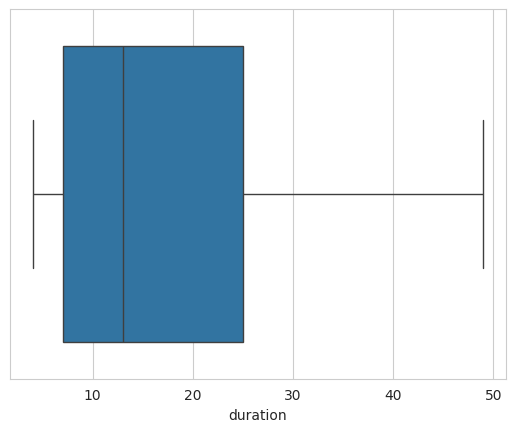

In [ ]:
#seeing if outliers were removed
sns.boxplot(x=bike_df['duration'])

##3a. Quality Investigation Summary (Bike Share)
There were 24,995 duplicates that were removed from the dataset. I encountered a minor issue with null values in the ‘passholder_type’ column. Upon further investigation, it was realized that the null values represented people who didn’t have a passholder plan. Instead of leaving those values null, they were replaced with ‘None’ to indicate that they do not have a passholder plan. There were some outliers for the latitude and longitude columns but these columns are for geospatial purposes. ‘duration’ did have some outliers as previously thought. Tried the Tukey Method and it would’ve wiped out 10% of the dataset while not fully removing all of the outliers. The Z score method yielded similar results as it would’ve removed a little over 10% of the dataset while still not fully removing all outliers. I tried using the Z score with Winsorization and I received similar results. Log transformation did not remove all of the outliers. Trimming made the min, max, mean, and all the quartiles at 4.0 in order to remove all outliers, which significantly skews the data. Box-cox did not remove all of the outliers either. I tried tuning and adjusting all of these methods where applicable and nothing worked. I settled on Winsorization, which removed all of the outliers while retaining all of the data points. I had to use an 11% Winsorization in order to accomplish this, which seems excessive, but the ‘duration’ attribute does have some extreme outliers when you consider that the minimum was 1, the maximum was 479, the mean was 24.07, the first quartile was 7, the second quartile was 12, and the third quartile was 25. After the cleaning process and column removals, we are left with 1,225,840 rows and 13 columns (we originally had 1,250,835 rows and 16 columns).

#**3b. Quality Investigation (Station)**
Deliverable: Cleaned dataset and report on the cleaning process.

##Dupes

In [ ]:
#checking for duplicates (without the index excluding 'station_id')
n_duplicates = station_df.drop(labels=['station_id'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 3 duplicates in your database.


In [ ]:
#removing duplicates
columns_to_consider = station_df.drop(labels=['station_id'], axis=1).columns

station_df.drop_duplicates(subset=columns_to_consider, inplace=True)
station_df.shape

(345, 4)

##Missing Values Per Column/Row

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

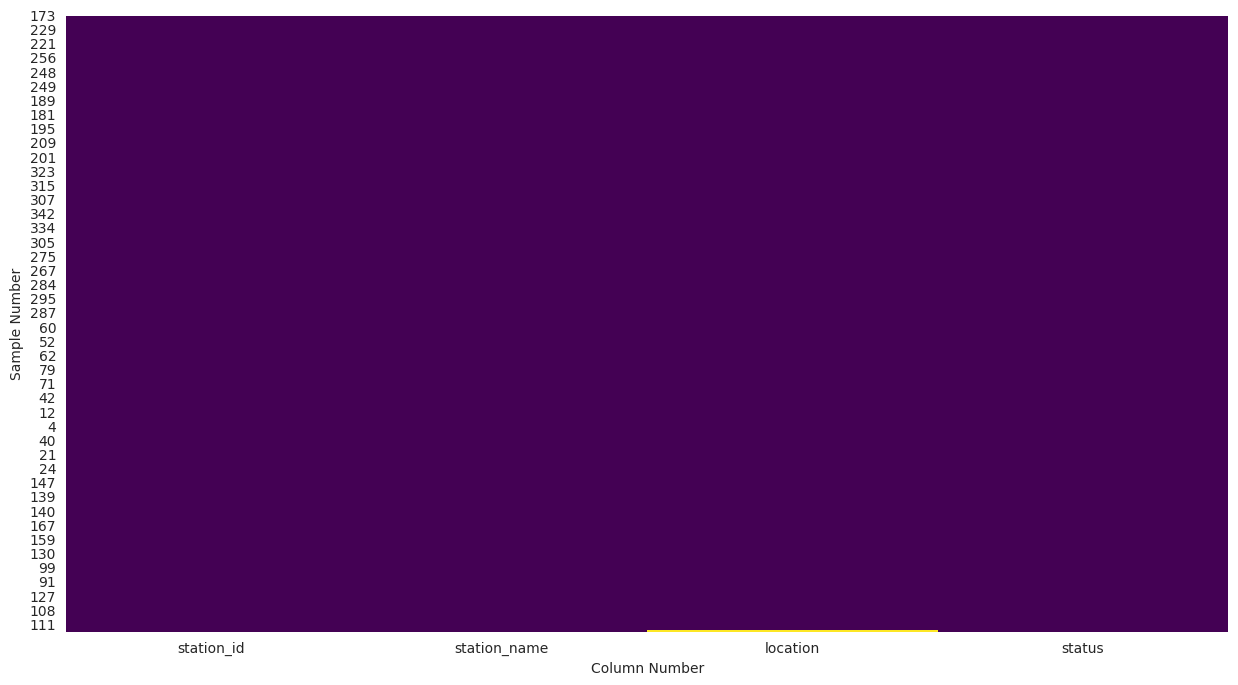

In [ ]:
#evaluating missing values (per sample/row)
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g2 = sns.heatmap(station_df.loc[station_df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g2.set_xlabel('Column Number')
g2.set_ylabel('Sample Number')

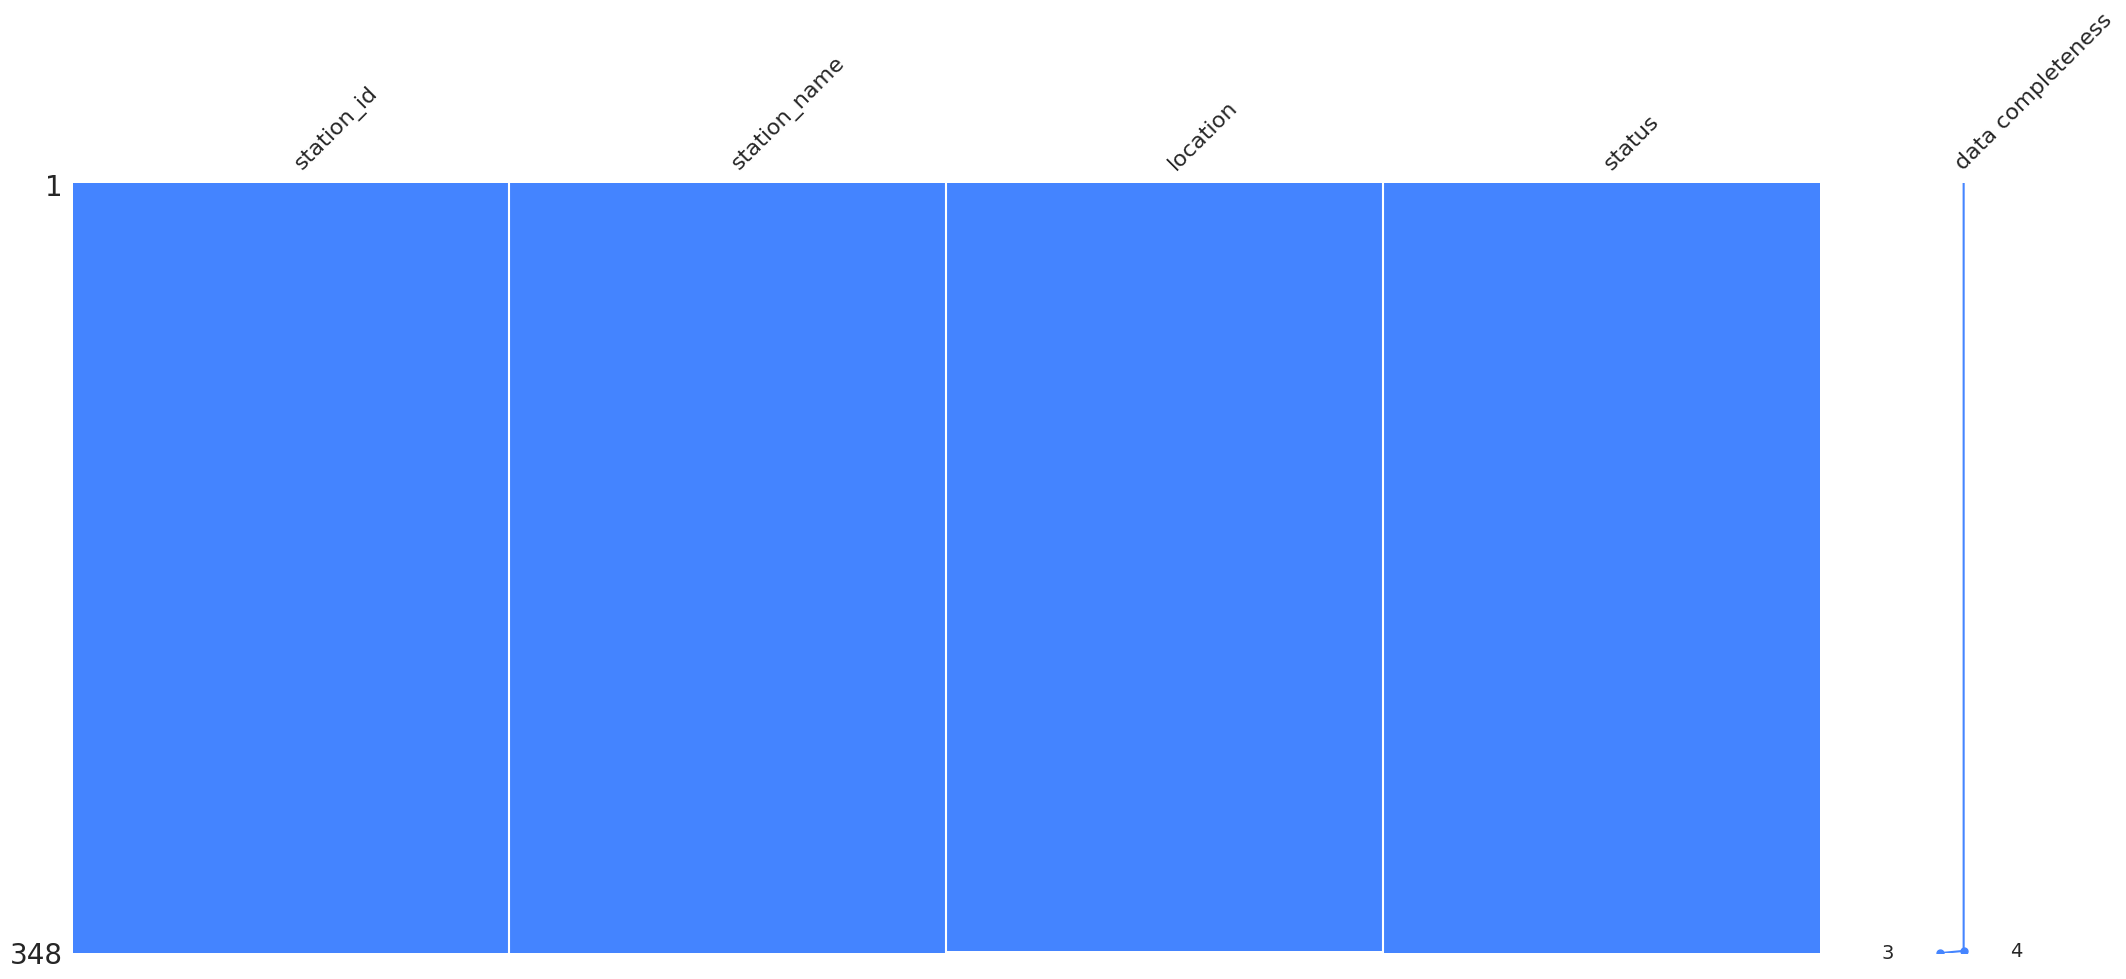

In [ ]:
#another view of missing values (per sample/row)
msno.matrix(station_df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
#dropping rows with 20% emptiness threshold
station_df = station_df.dropna(thresh=station_df.shape[1] * 0.80, axis=0).reset_index(drop=True)
station_df.shape

(347, 4)

<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.5815972222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

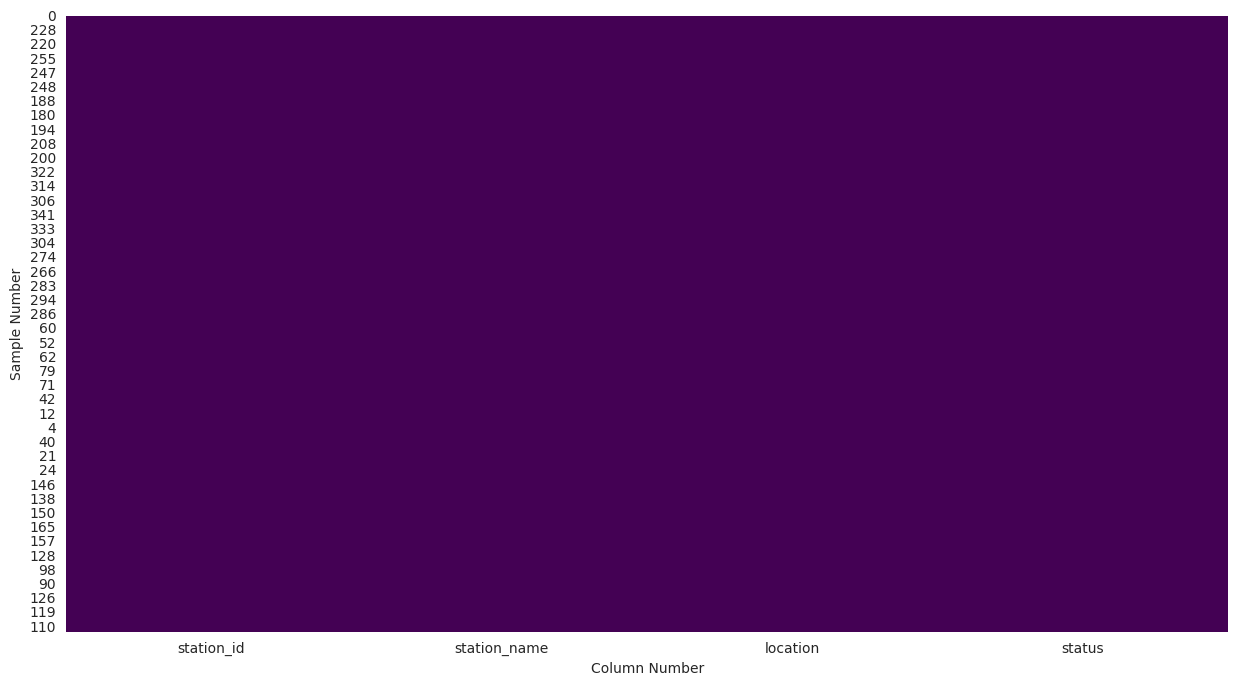

In [ ]:
#revaluating missing values (per sample/row) after dropping empties
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(station_df.loc[station_df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

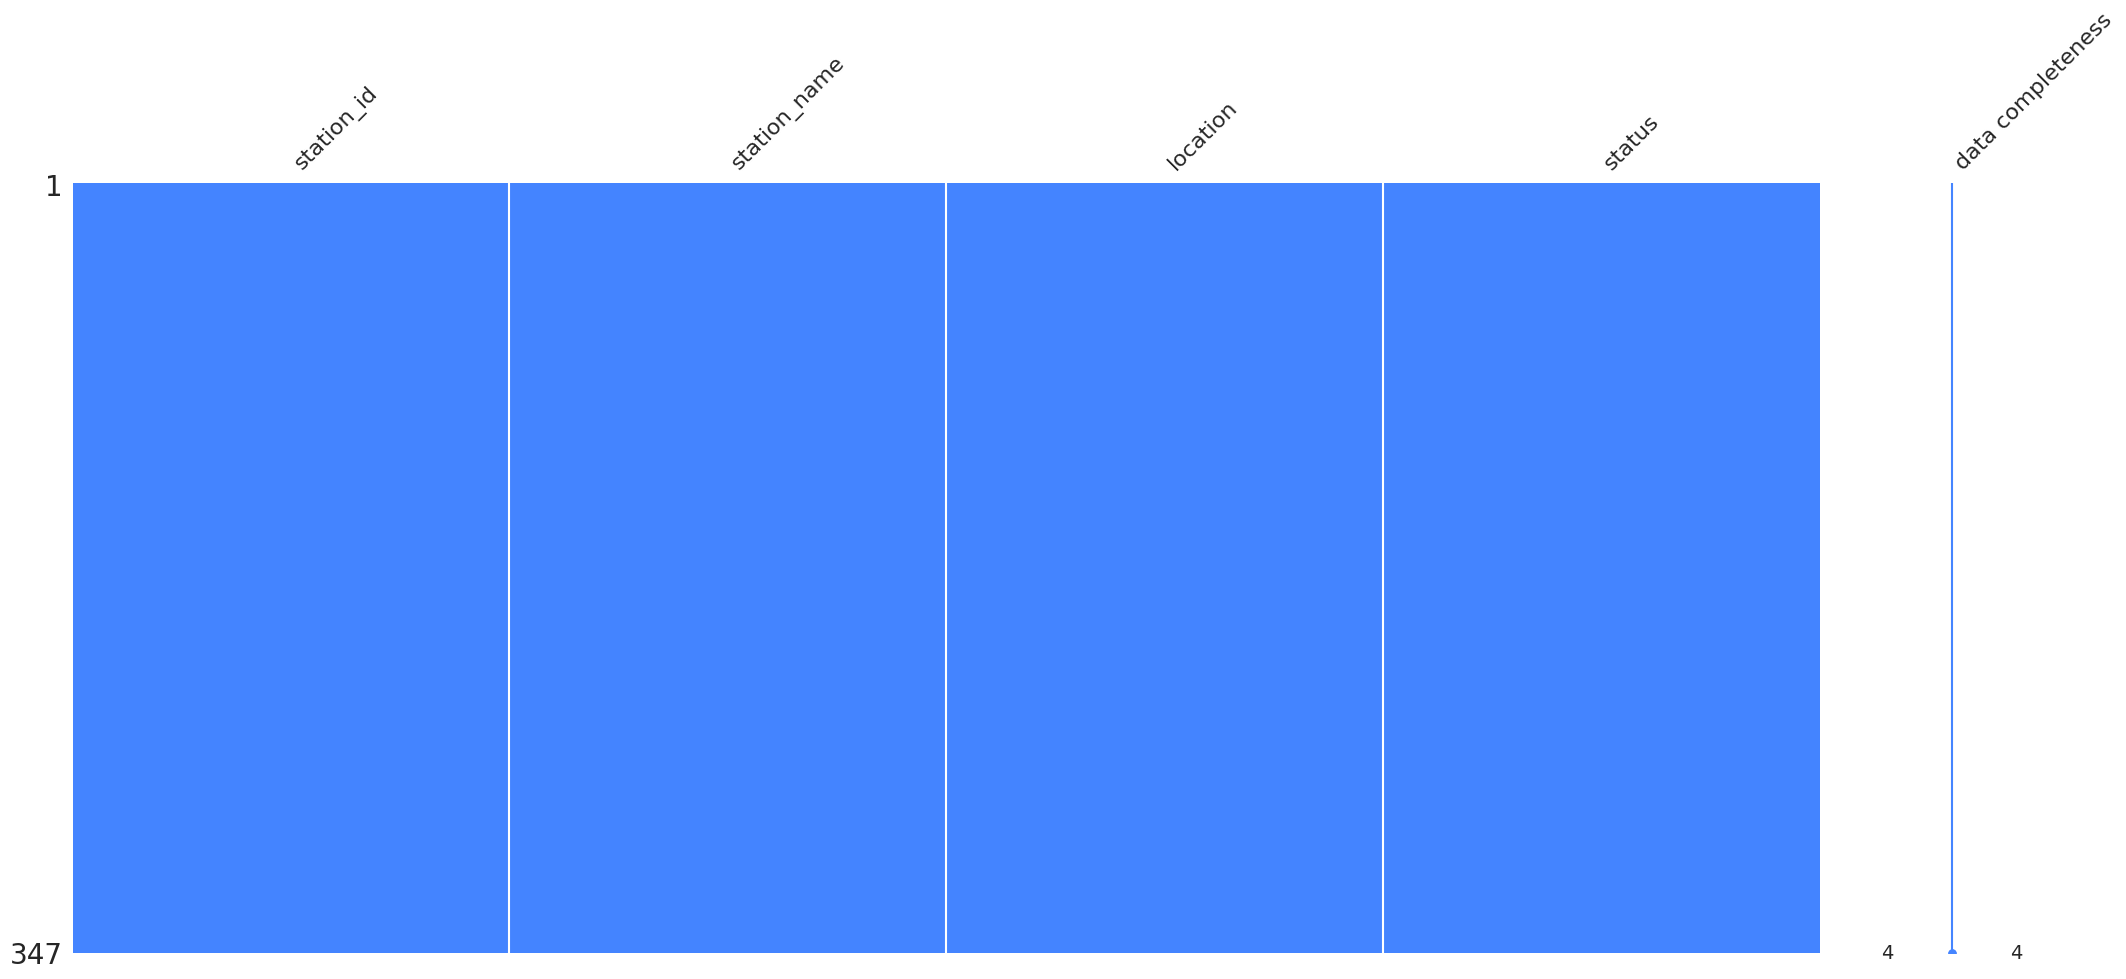

In [ ]:
#another look at revaluating missing values (per sample/row) after dropping empties
msno.matrix(station_df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

##Per Feature/Per Column

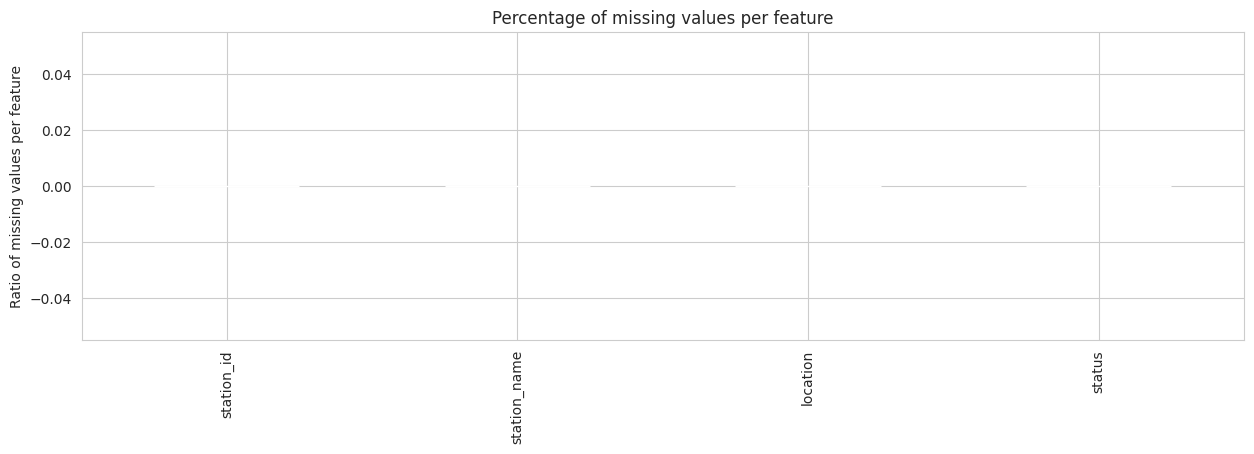

In [ ]:
#evaluating missing values (per feature/column)
station_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

##3a. Quality Investigation Summary (Station)
A total of 4 rows were removed during the duplicate removal, column removal, and cleaning process, leaving us with 344 rows and 4 columns from our original 348 rows and 5 columns.



#**4. Merge With Data Frame**
Deliverable: Merged dataset and explanation of the method used.

In [ ]:
#creating a station_id column in bike_df to merge the two datasets
bike_df['station_id'] = bike_df['end_station']

In [ ]:
#inner merging bike_df and station_df
df= pd.merge(bike_df, station_df, on='station_id', how='inner')

df.head()

,duration,bike_id,trip_route_category,passholder_type,bike_type,start_station,end_station,start_lat,start_lon,end_lat,end_lon,date,station_id,station_name,location,status
0,4,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active
1,33,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active
2,5,5861,Round Trip,Annual Pass,standard,3016,3016,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,3016,Los Angeles & Temple,DTLA,Active
3,7,6674,Round Trip,Walk-up,standard,3032,3032,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,3032,Hope & 6th,DTLA,Active
4,9,6108,One Way,Monthly Pass,standard,3033,3030,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,3030,Main & 1st,DTLA,Active


In [ ]:
#checking the shape of our new df
df.shape

(1224888, 16)

##Merge with Data Frame Summary
The Bike Share dataset does not have a common attribute with the Stations dataset, even though the two datasets are related. In order to merge them, I duplicated the ‘end_station’ column from the Bike Share dataset and formed a new column named ‘station_id.’ This works because ‘end_station’ has the exact same values as ‘station_id’ in the Stations dataset, making this a perfect way to merge the two datasets. I proceeded to merge the Bike Share dataset with the Stations dataset in preparation for feature engineering and EDA. I used an inner merge to accomplish this as I did not want create any new null values by using a left or right merge after already removing empties and outliers. We now have a total of 1,224,888 rows and 17 columns.


#**5. Data Binning**
Deliverable: Updated dataset with binned data.

In [ ]:
#binning 'duration' into bins of 5
bins = range(0, bike_df['duration'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df['duration_binned'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)
df.head()

,duration,bike_id,trip_route_category,passholder_type,bike_type,start_station,end_station,start_lat,start_lon,end_lat,end_lon,date,station_id,station_name,location,status,duration_binned
0,4,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,0-4
1,33,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,30-34
2,5,5861,Round Trip,Annual Pass,standard,3016,3016,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,3016,Los Angeles & Temple,DTLA,Active,5-9
3,7,6674,Round Trip,Walk-up,standard,3032,3032,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,3032,Hope & 6th,DTLA,Active,5-9
4,9,6108,One Way,Monthly Pass,standard,3033,3030,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,3030,Main & 1st,DTLA,Active,5-9


##Data Binning Summary
I decided to bin ‘duration’ in bins of 5 to group together the amount of minutes each trip takes. This can help us better evaluate duration frequency during the analyzation process by not being subjected to each individual minute value represented inside of a 1M+ dataset.

#**6. Lambda Function Application**
Deliverable: Implementation of lambda function and explanation.

In [ ]:
#creating a lambda function that extracts year from the 'date' feature
df['year'] = df['date'].apply(lambda x: x.year)
df.head()

,duration,bike_id,trip_route_category,passholder_type,bike_type,start_station,end_station,start_lat,start_lon,end_lat,end_lon,date,station_id,station_name,location,status,duration_binned,year
0,4,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,0-4,2016
1,33,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,30-34,2016
2,5,5861,Round Trip,Annual Pass,standard,3016,3016,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,3016,Los Angeles & Temple,DTLA,Active,5-9,2016
3,7,6674,Round Trip,Walk-up,standard,3032,3032,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,3032,Hope & 6th,DTLA,Active,5-9,2016
4,9,6108,One Way,Monthly Pass,standard,3033,3030,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,3030,Main & 1st,DTLA,Active,5-9,2016


##Lambda Function Summary
I created a new column ‘year’ from the ‘date’ column as I wanted to get annual insights when it comes time to do an exploratory data analysis.



#**7. Feature Engineering**
Deliverable: Dataset with a new feature and rationale.

In [ ]:
#changing the name of the station_name' feature to 'end_station_name and 'location' to 'end_location'
df = df.rename(columns={'station_name': 'end_station_name', 'location' : 'end_location' })
df.head()

,duration,bike_id,trip_route_category,passholder_type,bike_type,start_station,end_station,start_lat,start_lon,end_lat,end_lon,date,station_id,end_station_name,end_location,status,duration_binned,year
0,4,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,0-4,2016
1,33,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,30-34,2016
2,5,5861,Round Trip,Annual Pass,standard,3016,3016,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,3016,Los Angeles & Temple,DTLA,Active,5-9,2016
3,7,6674,Round Trip,Walk-up,standard,3032,3032,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,3032,Hope & 6th,DTLA,Active,5-9,2016
4,9,6108,One Way,Monthly Pass,standard,3033,3030,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,3030,Main & 1st,DTLA,Active,5-9,2016


In [ ]:
#in order to complete the merge, we needed a common feature in both datasets. 'station_id' in 'bike_df' came from 'end_station'.
#after the merge, all of the data that came from the 'station_df' dataset was based off of the 'end_station' data.
#creating another merge, this time based off of the 'start_station' data, so that we are able to have accurate information in regard to starting station and ending station data.
df = df.merge(station_df[['station_id', 'location', 'station_name']], left_on='start_station', right_on='station_id', suffixes=('', '_start'))

df.head()

,duration,bike_id,trip_route_category,passholder_type,bike_type,start_station,end_station,start_lat,start_lon,end_lat,end_lon,date,station_id,end_station_name,end_location,status,duration_binned,year,station_id_start,location,station_name
0,4,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,0-4,2016,3014,DTLA,Union Station West Portal
1,33,6281,Round Trip,Monthly Pass,standard,3014,3014,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,3014,Union Station West Portal,DTLA,Active,30-34,2016,3014,DTLA,Union Station West Portal
2,5,5861,Round Trip,Annual Pass,standard,3016,3016,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,3016,Los Angeles & Temple,DTLA,Active,5-9,2016,3016,DTLA,Los Angeles & Temple
3,7,6674,Round Trip,Walk-up,standard,3032,3032,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,3032,Hope & 6th,DTLA,Active,5-9,2016,3032,DTLA,Hope & 6th
4,9,6108,One Way,Monthly Pass,standard,3033,3030,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,3030,Main & 1st,DTLA,Active,5-9,2016,3033,DTLA,Main & 9th


In [ ]:
#dropping unncessary columns
df.drop(columns=['station_id','station_id_start', 'start_station', 'end_station'], inplace=True)

In [ ]:
#renaming our new columns accordingly
df = df.rename(columns={'station_name': 'start_station_name', 'location' : 'start_location' })
df.head()

,duration,bike_id,trip_route_category,passholder_type,bike_type,start_lat,start_lon,end_lat,end_lon,date,end_station_name,end_location,status,duration_binned,year,start_location,start_station_name
0,4,6281,Round Trip,Monthly Pass,standard,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,Union Station West Portal,DTLA,Active,0-4,2016,DTLA,Union Station West Portal
1,33,6281,Round Trip,Monthly Pass,standard,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,Union Station West Portal,DTLA,Active,30-34,2016,DTLA,Union Station West Portal
2,5,5861,Round Trip,Annual Pass,standard,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,Los Angeles & Temple,DTLA,Active,5-9,2016,DTLA,Los Angeles & Temple
3,7,6674,Round Trip,Walk-up,standard,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,Hope & 6th,DTLA,Active,5-9,2016,DTLA,Hope & 6th
4,9,6108,One Way,Monthly Pass,standard,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,Main & 1st,DTLA,Active,5-9,2016,DTLA,Main & 9th


In [ ]:
#reordering the dataframe for easier comprehension
columns_order = [
    'duration', 'duration_binned', 'bike_id', 'trip_route_category',
    'passholder_type', 'bike_type', 'start_station_name', 'end_station_name',
    'start_location', 'end_location', 'start_lat', 'start_lon',
    'end_lat', 'end_lon', 'date', 'year', 'status'
]

df = df[columns_order]
df.head()

,duration,duration_binned,bike_id,trip_route_category,passholder_type,bike_type,start_station_name,end_station_name,start_location,end_location,start_lat,start_lon,end_lat,end_lon,date,year,status
0,4,0-4,6281,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,DTLA,DTLA,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,2016,Active
1,33,30-34,6281,Round Trip,Monthly Pass,standard,Union Station West Portal,Union Station West Portal,DTLA,DTLA,34.056610,-118.23721,34.056610,-118.23721,2016-01-01,2016,Active
2,5,5-9,5861,Round Trip,Annual Pass,standard,Los Angeles & Temple,Los Angeles & Temple,DTLA,DTLA,34.052898,-118.24156,34.052898,-118.24156,2016-01-01,2016,Active
3,7,5-9,6674,Round Trip,Walk-up,standard,Hope & 6th,Hope & 6th,DTLA,DTLA,34.049889,-118.25588,34.049889,-118.25588,2016-01-01,2016,Active
4,9,5-9,6108,One Way,Monthly Pass,standard,Main & 9th,Main & 1st,DTLA,DTLA,34.040989,-118.25580,34.051941,-118.24353,2016-01-01,2016,Active


In [ ]:
df.shape

(1224539, 17)

##Feature Engineering Summary
I had to use some feature engineering techniques during the Structural Investigation and Quality Investigation aspect of this assignment in order to properly prepare the data for cleaning and merging. I created a new feature ‘date’ that replaced start_time and end_time, as those columns were unable to convert to datetime datatypes due to corrupt data. I extracted the data from ‘start_time’ in order to create the ‘date’ feature (more details on that in the Structural Investigation Summary) as a way to get around the corrupt data and introduce a datetime datatype to the dataset.   

The ‘passholder_type’ column had null values that needed to be addressed. During my Quality Investigation, it was realized that the null values represented people who didn’t have a passholder plan. Instead of leaving those values null, they were replaced with ‘None’ to indicate that they do not have a passholder plan, maintaining the integrity of the dataset without having to remove more data, while removing null values simultaneously.

During my Quality Investigation, I noticed ‘trip_route_category’ had some issues with inaccurate values. There were 6 values in the ‘trip_route_category’ column when there were only supposed to be 2, ‘Round Trip’ and ‘One Way.’  I went to the source and saw that anything other than ‘Round Trip’ is supposed to be ‘One Way.’ I had to engineer the ‘trip_route_category’ column to correct this, so anything that was not ‘Round Trip’ became ‘One Way.’

As stated in the ‘Merge with Data Frame Summary,’ I created a ‘station_id’ column inside of the Bike Share dataset (with data from the ‘end_station’ column in the Bike Share dataset) in order to merge with the Stations dataset. When the other features from the Stations dataset merged with the Bike Share dataset, the data was based off of the ‘end_station’ column, thus these features were all synchronized. In order to get accurate information in regard to stations from the start of the trips in the dataset, I did a second merge, this time basing the data from the ‘start_station’ data, allowing that data to synchronize with the features from the Stations dataset. Now we have a more in-depth look at starting station data and ending station data.



#**8. Deep EDA**
Deliverable: Report with insights and visualizations.

<Figure size 1000x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x79a1712d69d0>,
 [Text(0.4196929592294198, -1.0167879916547269, 'One Way'),
  Text(-0.41969286403085554, 1.016788030949213, 'Round Trip')],
 [Text(0.22892343230695622, -0.5546116318116691, '84.7% (1,036,974)'),
  Text(-0.22892338038046664, 0.5546116532450253, '15.3% (187,565)')])

Text(0.5, 1.0, 'Trip Route Category')

(-1.0999999839911148,
 1.0999998301294815,
 -1.0999999486549774,
 1.0999996421785876)

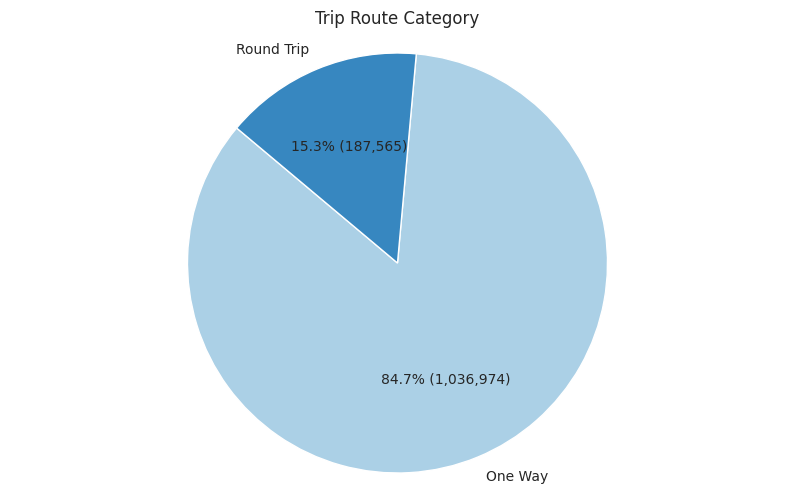

In [ ]:
#visualizing 'trip_route_category'
trip_route_counts = df['trip_route_category'].value_counts()

labels = trip_route_counts.index
sizes = trip_route_counts.values
colors = sns.color_palette("Blues", len(labels))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:,d})'
    return my_format

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=140)
plt.title('Trip Route Category')
plt.axis('equal')

plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='passholder_type'>

Text(0.5, 1.0, 'Passholder Type')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'passholder_type')

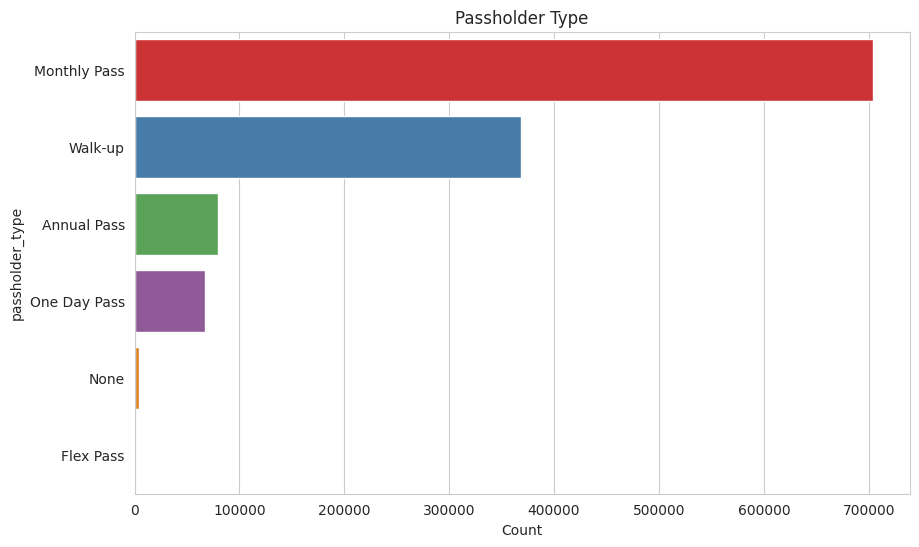

In [ ]:
#visualizing 'passholder_type' counts
order2 = df['passholder_type'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(y="passholder_type", data=df, palette="Set1", order= order2)
plt.title('Passholder Type')
plt.xlabel('Count')
plt.ylabel('passholder_type')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='bike_type'>

Text(0.5, 1.0, 'Bike Type')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'bike_type')

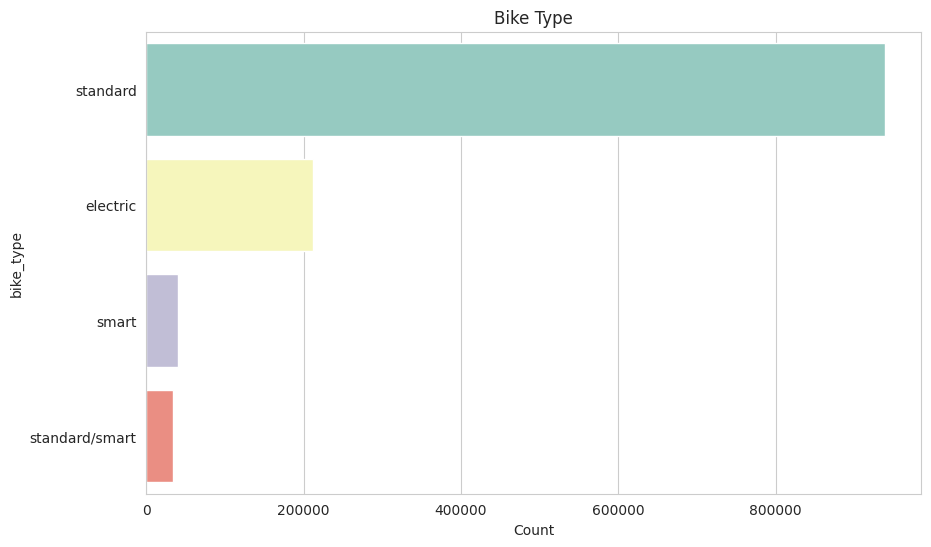

In [ ]:
#visualizing 'bike_type' counts
order3 = df['bike_type'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(y="bike_type", data=df, palette="Set3", order= order3)
plt.title('Bike Type')
plt.xlabel('Count')
plt.ylabel('bike_type')
plt.show()

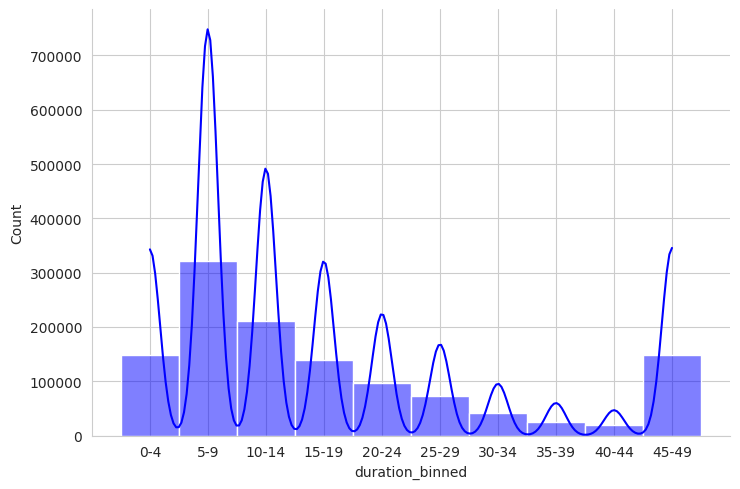

In [ ]:
#visualizing 'duration_binned'
sns.displot(x="duration_binned", data=df, kind='hist', color="Blue", kde=True, aspect=1.5)

<Axes: xlabel='year', ylabel='count'>

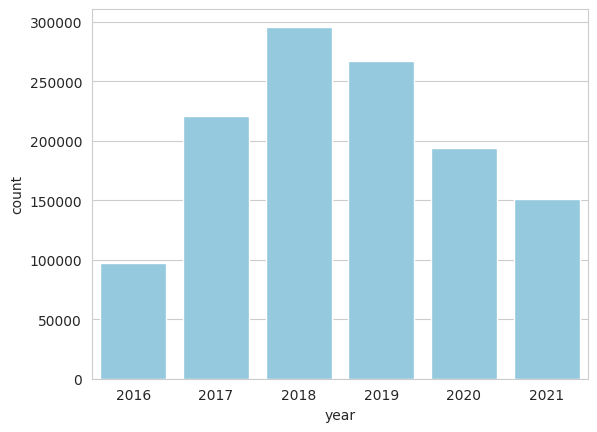

In [ ]:
#visualizing 'year'counts
sns.countplot(x="year", data=df, color="Skyblue")

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='start_location'>

Text(0.5, 1.0, 'Start Location Counts')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Start Location')

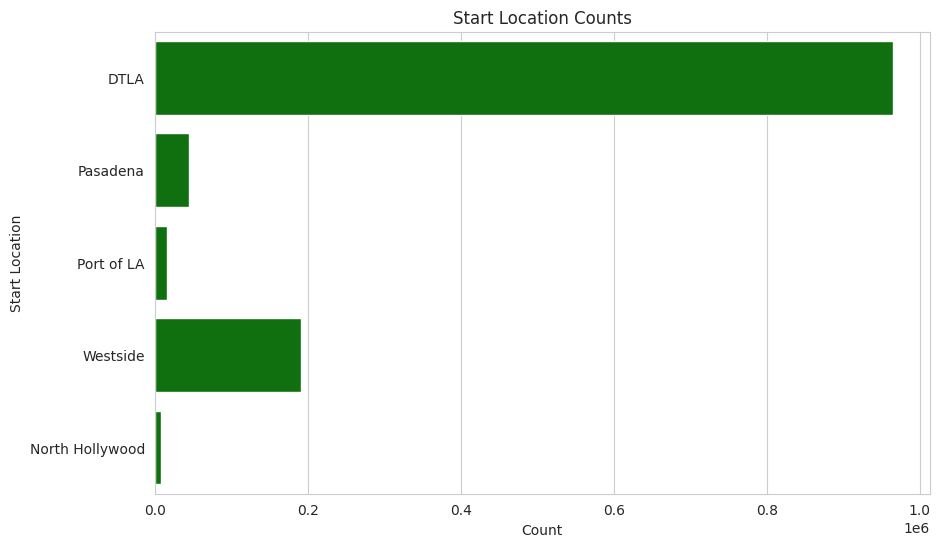

In [ ]:
#visualizing 'start_location' counts
plt.figure(figsize=(10, 6))
sns.countplot(y="start_location", data=df, color="Green")
plt.title('Start Location Counts')
plt.xlabel('Count')
plt.ylabel('Start Location')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='end_location'>

Text(0.5, 1.0, 'End Location Counts')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'End Location')

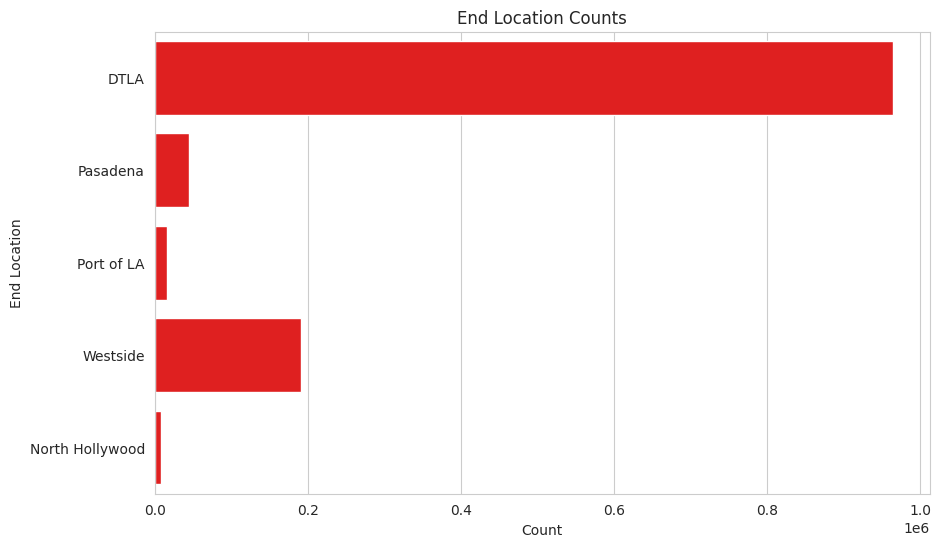

In [ ]:
#visualizing 'end_location' counts
plt.figure(figsize=(10, 6))
sns.countplot(y="end_location", data=df, color="Red")
plt.title('End Location Counts')
plt.xlabel('Count')
plt.ylabel('End Location')
plt.show()

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='start_station_name'>

Text(0.5, 1.0, 'Top 5 Start Stations')

Text(0.5, 0, 'Starting Station')

Text(0, 0.5, 'Number of Trips')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '7th & Flower'),
  Text(1, 0, 'Ocean Front Walk & Navy'),
  Text(2, 0, 'Main & 1st'),
  Text(3, 0, 'Union Station West Portal'),
  Text(4, 0, '7th & Spring')])

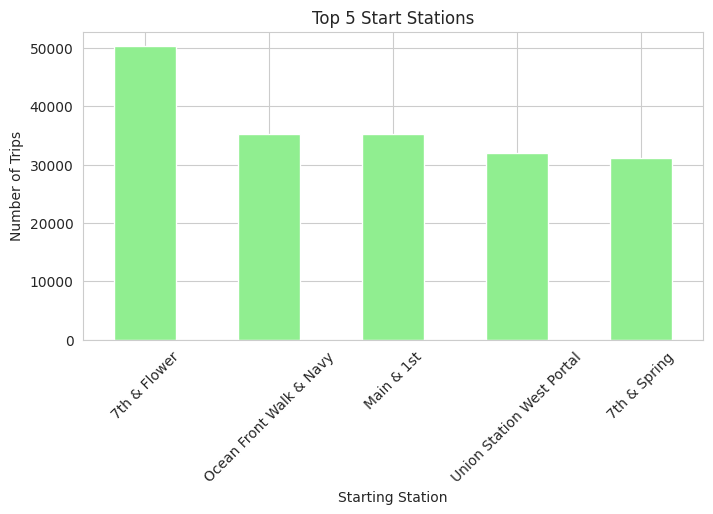

In [ ]:
#visualizing top 5 most popular starting stations
top_stations_start = df['start_station_name'].value_counts().head(5)

plt.figure(figsize=(8, 4))
top_stations_start.plot(kind='bar', color='Lightgreen')
plt.title('Top 5 Start Stations')
plt.xlabel('Starting Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='end_station_name'>

Text(0.5, 1.0, 'Top 5 End Stations')

Text(0.5, 0, 'Ending Station')

Text(0, 0.5, 'Number of Trips')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '7th & Flower'),
  Text(1, 0, 'Union Station West Portal'),
  Text(2, 0, '7th & Spring'),
  Text(3, 0, 'Ocean Front Walk & Navy'),
  Text(4, 0, 'Main & 1st')])

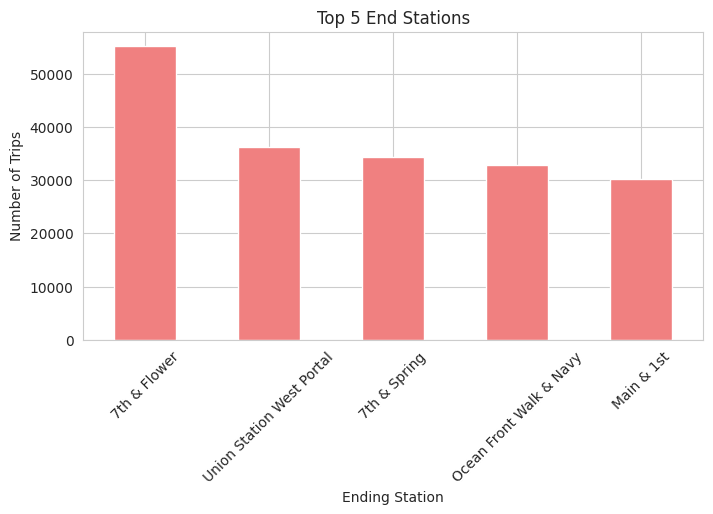

In [ ]:
#visualizing top 5 most popular ending stations
top_stations_end = df['end_station_name'].value_counts().head(5)

plt.figure(figsize=(8, 4))
top_stations_end.plot(kind='bar', color='Lightcoral')
plt.title('Top 5 End Stations')
plt.xlabel('Ending Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x79a167e3a110>,
 [Text(-0.2931212311556047, -1.0602263644363041, 'Active Stations'),
  Text(0.2931212311556048, 1.0602263644363041, 'Inactive Stations')],
 [Text(-0.15988430790305708, -0.5783052896925295, '63.6% (217)'),
  Text(0.15988430790305716, 0.5783052896925295, '36.4% (124)')])

Text(0.5, 1.0, 'Number of Active/Inactive Stations')

(-1.0999981719208525,
 1.099998607813688,
 -1.0999978124971328,
 1.0999954510973642)

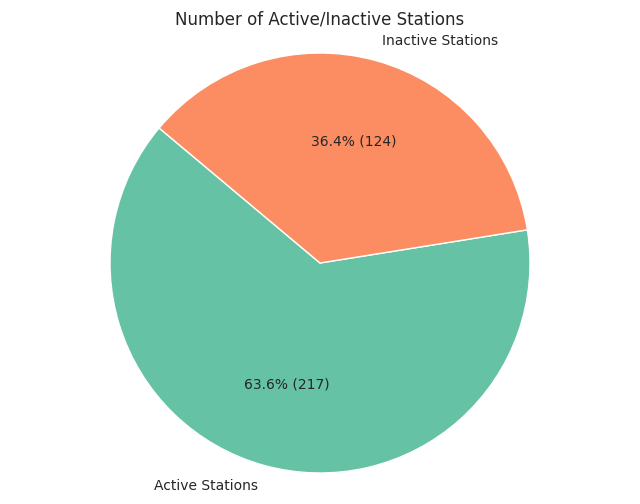

In [ ]:
#visualizing 'active' and 'inactive' counts
active_stations = df[df['status'] == 'Active']['end_station_name'].nunique()
inactive_stations = df[df['status'] == 'Inactive']['end_station_name'].nunique()

labels = ['Active Stations', 'Inactive Stations']
sizes = [active_stations, inactive_stations]
colors = ['#66c2a5', '#fc8d62']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_format

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=140)
plt.title('Number of Active/Inactive Stations')
plt.axis('equal')

plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='year'>

Text(0.5, 1.0, 'Trip Route Category by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

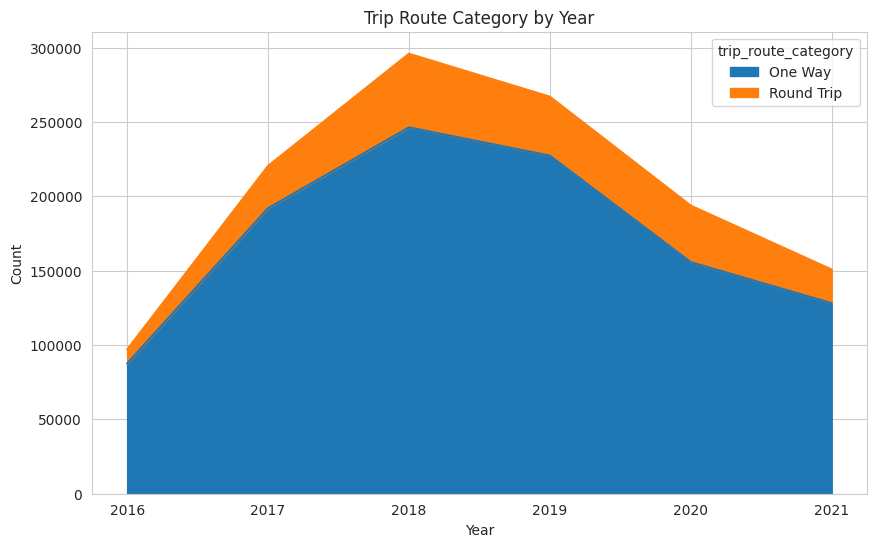

In [ ]:
#visualizing 'trip_route_category' by 'year'
plt.figure(figsize=(10, 6))
df.groupby('year')['trip_route_category'].value_counts().unstack().plot(kind='area', stacked=True, figsize=(10, 6))
plt.title("Trip Route Category by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='passholder_type', ylabel='duration'>

Text(0.5, 1.0, 'Average Duration (in Minutes) per Passholder Type')

Text(0.5, 0, 'Passholder Type')

Text(0, 0.5, 'Average Duration')

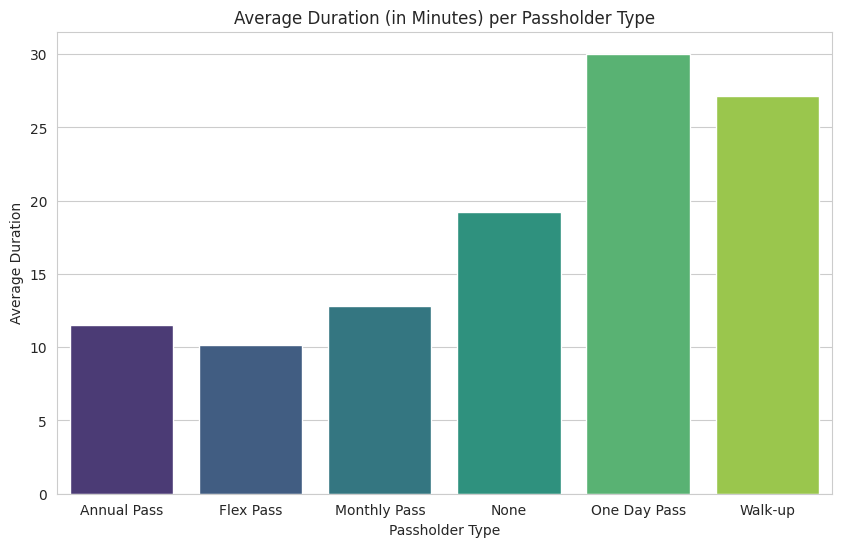

In [ ]:
#visualizing the 'average duration' per 'passholder_type'
avg_duration = df.groupby('passholder_type')['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='passholder_type', y='duration', data=avg_duration, palette='viridis')
plt.title('Average Duration (in Minutes) per Passholder Type')
plt.xlabel('Passholder Type')
plt.ylabel('Average Duration')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Total Duration (in Minutes) by Year')

Text(0.5, 9.444444444444438, 'Year')

Text(22.694444444444443, 0.5, 'Total Minutes')

<Figure size 1000x600 with 0 Axes>

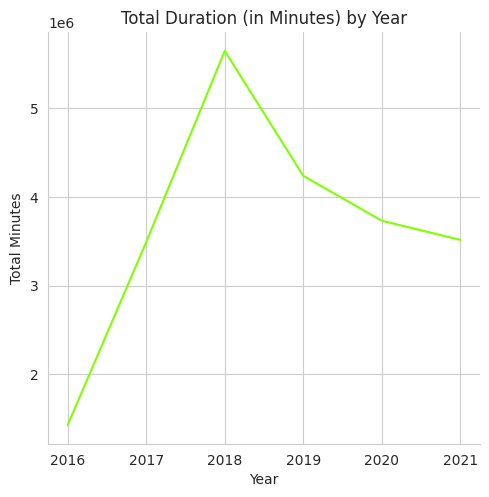

In [ ]:
#visualizing the total 'duration' by 'year'
avg_duration_yr_sum = df.groupby('year')['duration'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.relplot(x='year', y='duration', data=avg_duration_yr_sum, kind='line', color='chartreuse')
plt.title('Total Duration (in Minutes) by Year')
plt.xlabel('Year')
plt.ylabel('Total Minutes')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Average Duration (in Minutes) by Year')

Text(0.5, 9.444444444444438, 'Year')

Text(13.694444444444445, 0.5, 'Average Duration')

<Figure size 1000x600 with 0 Axes>

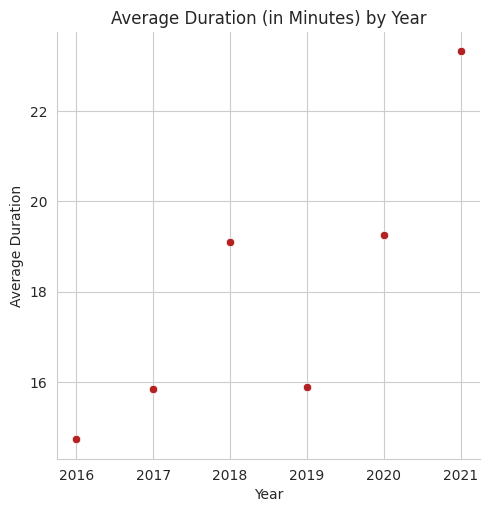

In [ ]:
#visualizing the average 'duration' by 'year'
avg_duration_yr = df.groupby('year')['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.relplot(x='year', y='duration', data=avg_duration_yr, color='firebrick')
plt.title('Average Duration (in Minutes) by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='passholder_type', ylabel='count'>

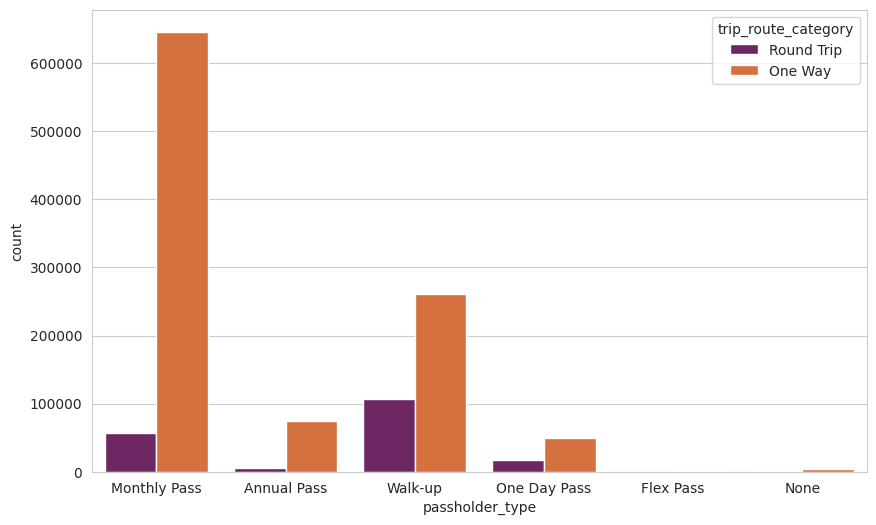

In [ ]:
#visualizing the 'passholder_type' by 'trip_route_category'
plt.figure(figsize=(10, 6))

sns.countplot(x="passholder_type", hue="trip_route_category", data=df, palette="inferno")

plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='year'>

Text(0.5, 1.0, 'Passholder Type by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

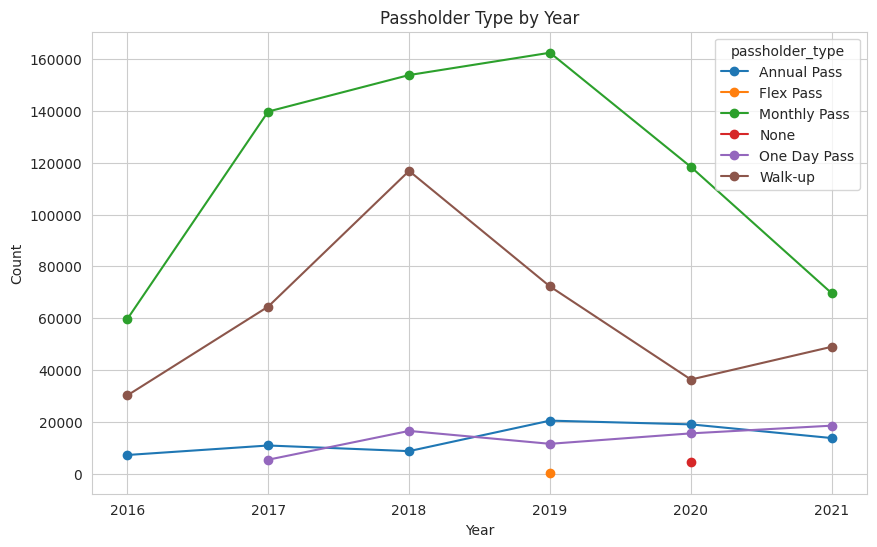

In [ ]:
#visualizing 'passholder_type' by 'year'
plt.figure(figsize=(10, 6))
df.groupby('year')['passholder_type'].value_counts().unstack().plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Passholder Type by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='year'>

Text(0.5, 1.0, 'Starting Location by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

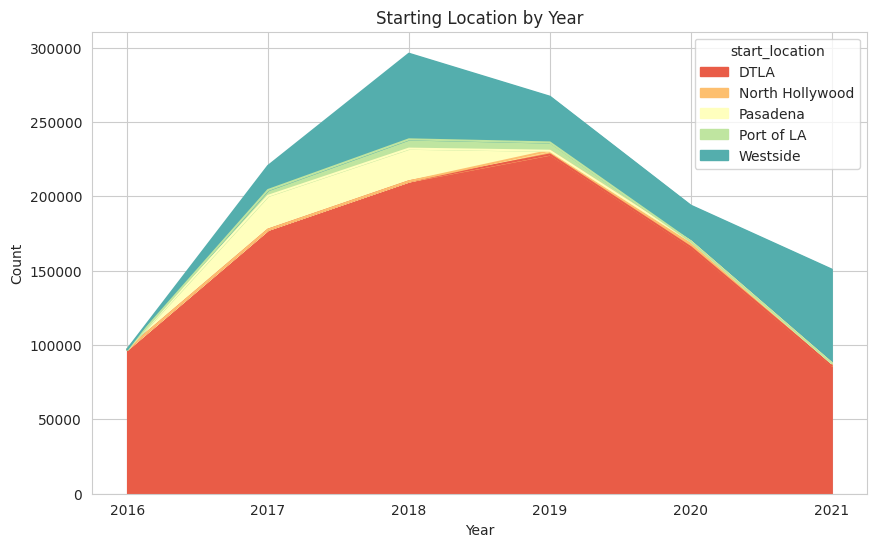

In [ ]:
#visualizing 'start_location' by 'year'
start_palette = sns.color_palette("Spectral", n_colors=df['start_location'].nunique())
plt.figure(figsize=(10, 6))
df.groupby('year')['start_location'].value_counts().unstack().plot(kind='area', stacked=True, figsize=(10, 6), color=start_palette)
plt.title("Starting Location by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='year'>

Text(0.5, 1.0, 'Ending Location by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

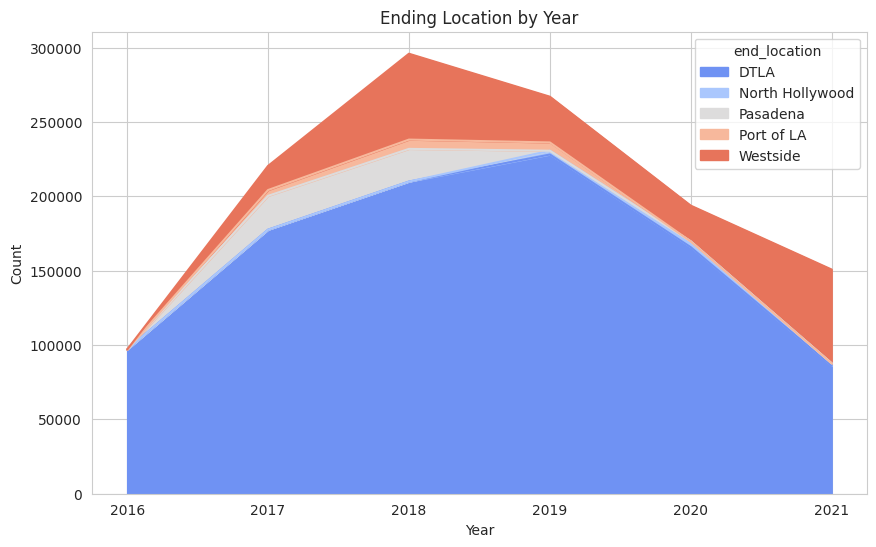

In [ ]:
#visualizing 'end_location' by 'year'
end_palette = sns.color_palette("coolwarm", n_colors=df['end_location'].nunique())
plt.figure(figsize=(10, 6))
df.groupby('year')['end_location'].value_counts().unstack().plot(kind='area', stacked=True, figsize=(10, 6), color=end_palette)
plt.title("Ending Location by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Top Stations for Each Passholder Type')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Station Name')

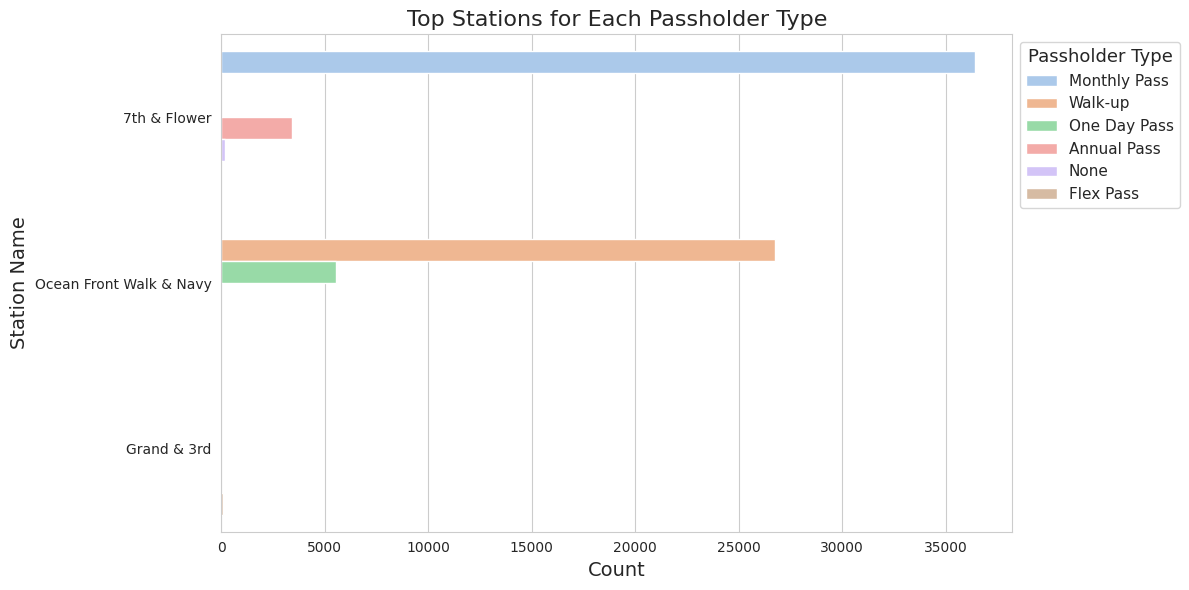

In [ ]:
#visualizing the top stations for each 'passholder_type'
start_top_stations = df.groupby(['passholder_type', 'start_station_name']).size().reset_index(name='count')
start_top_stations = start_top_stations.sort_values(['count'], ascending=False).drop_duplicates('passholder_type')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='count', y='start_station_name', hue='passholder_type', data=start_top_stations, palette='pastel')

plt.title('Top Stations for Each Passholder Type', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Station Name', fontsize=14)

plt.legend(title='Passholder Type', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='start_location', ylabel='count'>

Text(0.5, 0, 'Area')

Text(0, 0.5, 'Number of Stations')

Text(0.5, 1.0, 'Number of Active and Inactive Stations per Area')

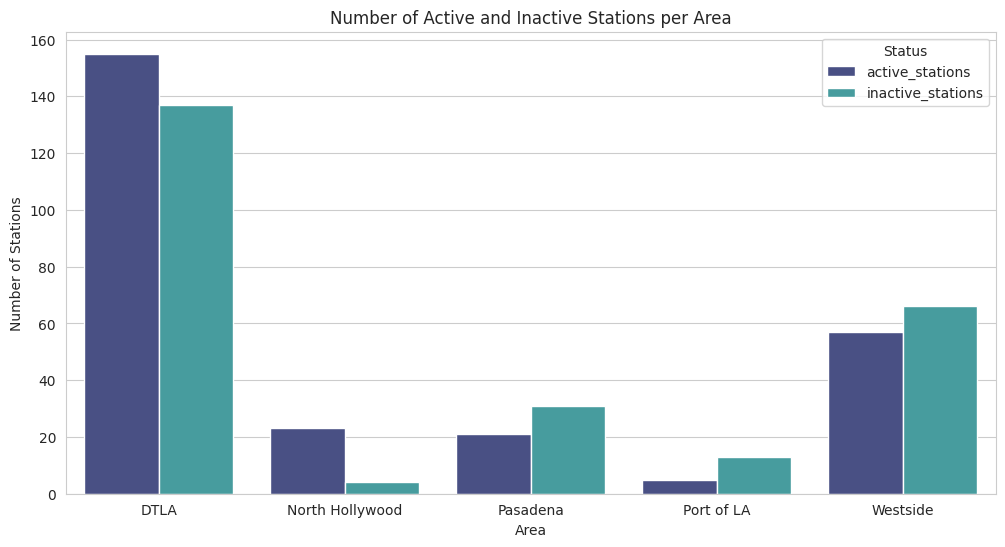

In [ ]:
#visualizing the number of active and inactive stations by area
active_df = df[df['status'] == 'Active']
inactive_df = df[df['status'] == 'Inactive']

active_stat = active_df.groupby('start_location')['start_station_name'].nunique().reset_index()
inactive_stat = inactive_df.groupby('start_location')['start_station_name'].nunique().reset_index()

active_stat.columns = ['start_location', 'active_stations']
inactive_stat.columns = ['start_location', 'inactive_stations']

stations = pd.merge(active_stat, inactive_stat, on='start_location', how='outer').fillna(0)

stations_melted = stations.melt(id_vars='start_location', value_vars=['active_stations', 'inactive_stations'],
                                var_name='status', value_name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='start_location', y='count', hue='status', data=stations_melted, palette='mako')

plt.xlabel('Area')
plt.ylabel('Number of Stations')
plt.title('Number of Active and Inactive Stations per Area')
plt.legend(title='Status', loc='upper right')

plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='year', ylabel='station_count'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Stations')

Text(0.5, 1.0, 'Number of Active and Inactive Stations Over the Years')

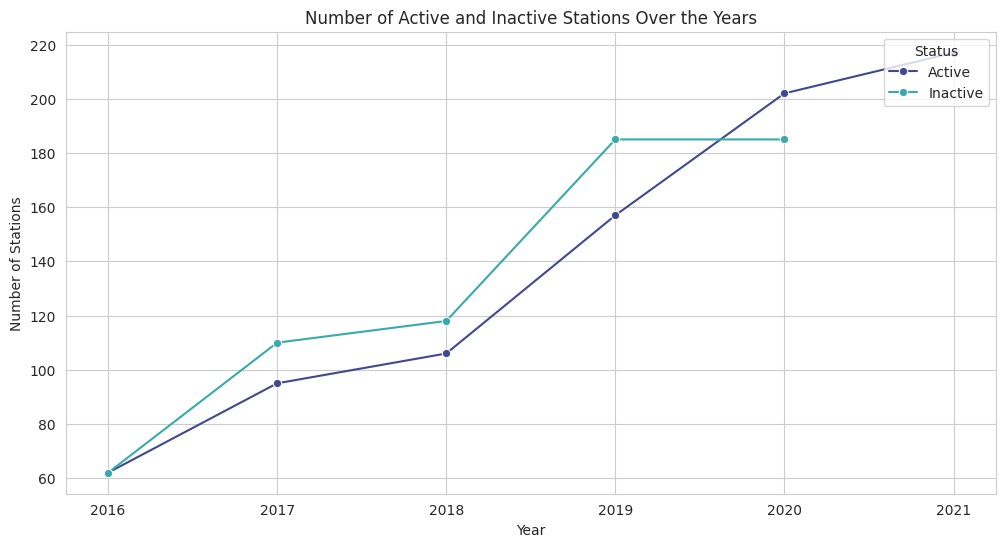

In [ ]:
#visualizing the number of active and inactive stations by area
stations_by_year = df.groupby(['year', 'status'])['start_station_name'].nunique().reset_index()

stations_by_year.columns = ['year', 'status', 'station_count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='station_count', hue='status', data=stations_by_year, marker='o', palette='mako')

plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.title('Number of Active and Inactive Stations Over the Years')
plt.legend(title='Status', loc='upper right')

plt.show()

##Deep EDA Summary
Most people that utilize the Metro Bike Share are monthly passholders, even though annual passes are more economically feasible as it would be cheaper on a monthly basis. This could be due to the fear of long-term commitment to spending money on annual pass for a service they may or may not need in the future. Factors that can contribute to this fear may or may not include job security, temporary living situations, fluctuation in exercise activity, etc.

Most people tend to use standard bikes rather than electric bikes, smart bikes, or a standard/smart hybrid. This can be due to feeling secure using a bike type that is more familiar to customers. Smart bikes and electric bikes are still relatively new considering how long standard bikes have been around, and some customers might feel intimidated by the new technology for the time being.

The average duration per bike trip is 5-9 minutes. This tells us that people are utilizing Metro Bike Share for relatively short distances. Being that most of the activity is centralized in the downtown area, this seems to make sense.

There has been a decrease in volume since peaking in 2018. There is not enough data in this particular dataset to come to a conclusion as to why that may be. More data would be needed in order to assess this properly.

The higher number of stations in the downtown area makes sense as there tends to be a higher concentration of people and businesses in downtown areas in general, which leads to more potential business opportunities for Metro Bike Share. These downtown areas tend to be congested with street traffic, so driving a car through these areas can be a hassle. Due to the high concentration of people traffic, there tend to be a lot of businesses accommodating the amount of people within the area. With that being said, people in downtown areas do not need to go far every time they need to make a purchase or have an experience. Having access to a bike when applicable can help avoid congested streets while getting to a destination quickly without exhausting yourself. You can avoid expensive parking situations as well by utilizing a bike in downtown areas. Also, downtown areas attract a lot of tourists which may or may not rent cars and wish to get around the downtown area via a cheaper means of transportation.

Out of the 5 areas of LA accounted for in this dataset, only two of them have a higher amount of active stations than inactive stations (Downtown LA and North Hollywood). In 2016 the number of active stations and inactive stations were equal (accounting for all areas of LA). 2017-2019 showed that there were more inactive stations than active stations overall. 2020 showed a higher amount of active stations overall and 2021 had no inactive stations to report. This could be due to the business figuring out what stations work best for various potential reasons: some stations might have better potential for business traffic, maybe there were better leasing opportunities for different station areas, stations that have higher crime rates might’ve led to the business abandoning that particular station for safer station areas, etc. It is important to note that although 3 areas of LA have more inactive stations than active stations, there is a total of more active stations overall (63.6% Active vs 36.4% Inactive).

Overall, it seems as though most people in the LA metropolitan area that use Metro Bike Share services tend to use them for one-way trips with an average duration of 5-9 minutes. The most popular pass Metro Bike Share sells is the Monthly Pass, the most popular type of bike seems to be the standard bike, the busiest area for rentals is Downtown LA (as the most bike stations are located in Downtown LA), and the busiest station out of all 217 active stations is the 7th and Flower station (located in Downtown LA). 2016 was the year that yielded the least amount of business and 2018 was the year that yielded the most. People that use the one-day pass have the longest duration on average and people that purchase the monthly pass, annual pass, day passes, walk-up users, and people without passes all tend to go on one-way trips rather than going on round trips.



#**Detailed numbers and information are available in the report attached to this assignment in Canvas if needed!**